# Separation of the Altika tracks

In [1]:
import sys
from os import getenv
import warnings
warnings.filterwarnings("ignore")

In [2]:
from gonzag.config import *
from gonzag.io import *
from gonzag.utils import *
from gonzag.mod2sat import *
from gonzag.bilin_mapping import *
from gonzag.spectralysis import *


## Data

In [3]:
import xarray as xr
osn_url = 'https://ncsa.osn.xsede.org/Pangeo/pangeo-forge/swot_adac/eNATL60_surface_region_1'
dsmod = xr.open_zarr(osn_url, consolidated=True)

In [4]:
dsmod

<xarray.Dataset>
Dimensions:        (time_counter: 2136, x: 611, y: 763)
Coordinates:
    depth          (y, x) float32 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e1f            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e1t            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e1u            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e1v            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e2f            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e2t            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e2u            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e2v            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    lat            (y, x) float32 dask.array<chunksize=(763, 611), meta=np.ndarray>
    lon            (y, x) float32 dask.array<chunksize=(763, 611), meta=np.ndarray>
    nav_lat        (y, x) float32 dask.array<chunksize=(763, 611), meta=np.ndarray>
    nav_lon        (y, x) float32 dask.array<chunksize=(763, 611), meta=np.ndarray>
    time_centered  (time_counter) datetime64[ns] dask.array<chunksize=(72,), meta=np.ndarray>
  * time_counter   (time_counter) datetime64[ns] 2010-02-01T00:30:00 ... 2010...
Dimensions without coordinates: x, y
Data variables:
    fmask          (y, x) int8 dask.array<chunksize=(763, 611), meta=np.ndarray>
    qt_oce         (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    somecrty       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    sometauy       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    sosaline       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    sossheig       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    sosstsst       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    sowaflup       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    sozocrtx       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    sozotaux       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    tmask          (y, x) int8 dask.array<chunksize=(763, 611), meta=np.ndarray>
    umask          (y, x) int8 dask.array<chunksize=(763, 611), meta=np.ndarray>
    vmask          (y, x) int8 dask.array<chunksize=(763, 611), meta=np.ndarray>

In [5]:
name_ssh_mod = 'sossheig'
name_lsm_mod = 'tmask' 
l_griddist = False

In [6]:
from intake import open_catalog
cat = open_catalog("https://raw.githubusercontent.com/pangeo-data/pangeo-datastore/master/intake-catalogs/ocean/altimetry.yaml")
dssat  = cat["al"].to_dask()

In [7]:
dssat

<xarray.Dataset>
Dimensions:         (time: 34340107)
Coordinates:
    latitude        (time) float64 dask.array<chunksize=(34340107,), meta=np.ndarray>
    longitude       (time) float64 dask.array<chunksize=(34340107,), meta=np.ndarray>
  * time            (time) datetime64[ns] 2013-03-14T05:44:50.445185024 ... 2...
Data variables:
    cycle           (time) int16 dask.array<chunksize=(34340107,), meta=np.ndarray>
    dac             (time) float64 dask.array<chunksize=(34340107,), meta=np.ndarray>
    lwe             (time) float64 dask.array<chunksize=(34340107,), meta=np.ndarray>
    mdt             (time) float64 dask.array<chunksize=(34340107,), meta=np.ndarray>
    ocean_tide      (time) float64 dask.array<chunksize=(34340107,), meta=np.ndarray>
    sla_filtered    (time) float64 dask.array<chunksize=(34340107,), meta=np.ndarray>
    sla_unfiltered  (time) float64 dask.array<chunksize=(34340107,), meta=np.ndarray>
    track           (time) int16 dask.array<chunksize=(34340107,), meta=np.ndarray>
Attributes:
    Conventions:               CF-1.6
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    cdm_data_type:             Swath
    comment:                   Sea surface height measured by altimeters refe...
    contact:                   servicedesk.cmems@mercator-ocean.eu
    creator_email:             servicedesk.cmems@mercator-ocean.eu
    creator_name:              CMEMS - Sea Level Thematic Assembly Center
    creator_url:               http://marine.copernicus.eu
    history:                   2019-02-20T19:39:52Z: Creation
    institution:               CLS, CNES
    keywords:                  Oceans > Ocean Topography > Sea Surface Height
    keywords_vocabulary:       NetCDF COARDS Climate and Forecast Standard Names
    license:                   http://marine.copernicus.eu/web/27-service-com...
    platform:                  Altika
    processing_level:          L3
    product_version:           2019
    project:                   COPERNICUS MARINE ENVIRONMENT MONITORING SERVI...
    references:                http://marine.copernicus.eu
    software_version:          6.2_DUACS_DT2018_baseline
    source:                    Altika measurements
    ssalto_duacs_comment:      The reference mission used for the altimeter i...
    standard_name_vocabulary:  NetCDF Climate and Forecast (CF) Metadata Conv...
    summary:                   SSALTO/DUACS Delayed-Time Level-3 sea surface ...
    title:                     DT Altika Global Ocean Along track SSALTO/DUAC...

In [8]:
name_ssh_sat='sla_unfiltered'

## Time overlap between model and satellite ?
Assume that model is less than 1 year, satellite has at least one whole year, we take the overlapping period without considering which year is this

In [9]:
    (date1,date2), (Nts,Ntm) = GetTimeOverlap( dssat , dsmod )
    print(' *** Time overlap between model and satellite in UNIX epoch time: it1, it2',date1,'--',date2)


 *** [GetTimeInfo()] Getting calendar/time info in dataset ...
   => time/record dimension is "time"
   => first and last date:  2013-03-14T05:44:50.445185024 -- 2015-03-31T22:41:36.909480960
 *** [GetTimeInfo()] Getting calendar/time info in dataset ...
   => time/record dimension is "time_counter"
   => first and last date:  2010-02-01T00:30:00.000000000 -- 2010-04-30T23:30:00.000000000

 *** Earliest/latest dates:
   => for satellite data: 2013-03-14T05:44:50.445185024 2015-03-31T22:41:36.909480960 
   => for model     data: 2010-02-01T00:30:00.000000000 2010-04-30T23:30:00.000000000 

 *** Time overlap between model and satellite in UNIX epoch time: it1, it2 2014-02-01 -- 2014-04-30


## Create object `ModelGrid` containing all the model (aka _source_) 2D+T domain grid info

In [10]:
  
    ModelGrid = ModGrid( dsmod, date1 , date2 , dsmod, name_lsm_mod, distorded_grid=False )


 *** [GetModelCoor()] Read model latitude (variable is "lat", with 2 dimensions! (763, 611) 

 *** [GetModelCoor()] Read model longitude (variable is "lon", with 2 dimensions! (763, 611) 


 *** what we use to define model land-sea mask:
    => "tmask" in dataset 

 *** [GridResolution()] Based on the longitude array, the model resolution ~=  0.016657295  degrees 

 *** Skipping computation of angle distortion of the model grid! ("-D" option not invoked)...

 *** About model gridded (source) domain:
     * shape =  (763, 611)
     * horizontal resolution:  0.016657295  degrees or  1.8507920147292316  km
     * Is this a global domain w.r.t longitude:  False
       ==> this is a regional domain
       ==> working in the [0:360] frame...
     * lon_min, lon_max =  281.99 292.17
     * lat_min, lat_max =  30.01 40.01
     * should we pay attention to possible STRONG local distorsion in the grid:  False
     * number of time records of interest for the interpolation to come:  2136
       =

In [11]:
SatelliteTrack = SatTrack( dssat, date1, date2, Np=Nts, \
                              domain_bounds=ModelGrid.domain_bounds, l_0_360=ModelGrid.l360 )

 *** [SatTrack()] Analyzing the time vector in dataset ...
 *** [GetSatCoor()] reading "latitude" in dataset ...
   => 4150072 records read...

 *** [GetSatCoor()] reading "longitude" in dataset ...
   => 4150072 records read...


 *** About satellite track (target) domain:
     * number of time records of interest for the interpolation to come:  10236
       ==> time record indices: 14883510 to 19033581, included



In [12]:
MG= ModelGrid
ST= SatelliteTrack

## Plots all the tracks for the period and region considered

In [13]:
import xarray as xr
import numpy as np
import glob
import os

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import cartopy
cartopy.config['pre_existing_data_dir']  = '/home/ad/alberta/git/cartopy_data' 
import matplotlib
matplotlib.rcParams.update({'font.size': 22})


In [14]:
latminM=np.min(MG.lat.values)
latmaxM=np.max(MG.lat.values)
lonminM=np.min(MG.lon.values)
lonmaxM=np.max(MG.lon.values)

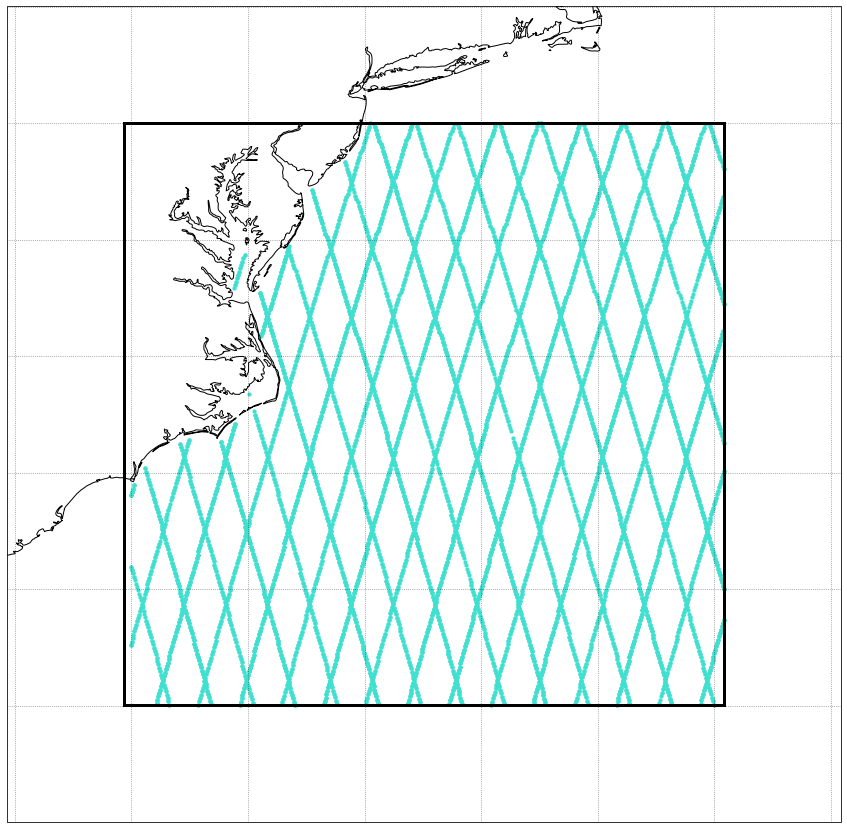

In [15]:
fig=plt.figure(figsize=(20,15))
ax = plt.subplot(111,projection=ccrs.PlateCarree(central_longitude=0))
ax.set_extent((lonminM-2, lonmaxM+2, latminM-2, latmaxM+2))
ax.coastlines(resolution="10m")
gl = ax.gridlines(draw_labels=True, linestyle=':', color='black',
                          alpha=0.5)
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax.tick_params('both',labelsize=22)

ax.plot([lonminM, lonminM], [latminM, latmaxM],color='black',linewidth=3,transform=ccrs.PlateCarree())
ax.plot([lonmaxM, lonmaxM], [latminM, latmaxM],color='black',linewidth=3,transform=ccrs.PlateCarree())
ax.plot([lonminM, lonmaxM], [latminM, latminM],color='black',linewidth=3,transform=ccrs.PlateCarree())
ax.plot([lonminM, lonmaxM], [latmaxM, latmaxM],color='black',linewidth=3,transform=ccrs.PlateCarree())    

plt.scatter(ST.lon,ST.lat, c='turquoise',
            label='altika tracks', linewidth=0, s=18,
            transform=ccrs.PlateCarree(),zorder=1);
plt.savefig('altika_tracks.png')

## Separation of the tracks

### First step : separation of the ascending and descending tracks

In [16]:
# I keep the indexes (first and last) of the portion where the sign of latitudes'derive is constant
it1=0
it2=0
index_tracks=[]
lat1=ST.lat.values
lon1=ST.lon.values
lat2=np.roll(lat1,-1)
deriv_lat=lat2-lat1
while it2 < len(ST.lat):
    it1=it2
    ind=np.where(np.sign(deriv_lat[it1:])==-1*np.sign(deriv_lat[it1]))
    if len(ind[0])>0:
        it=np.min(ind)
        it2=it1+it
        index_tracks.append([it1,it2])
    else:
        break


In [17]:
print(len(index_tracks))

85


In [18]:
#I cut off the segment when there is a leap in latitude or longitude that is bigger than 2° (execpt between beginning and ending of the segment)

k=0
while k < len(index_tracks):
    print(k)
    lat_sat_track=lat1[index_tracks[k][0]:index_tracks[k][1]]
    lon_sat_track=lon1[index_tracks[k][0]:index_tracks[k][1]]
    if len(lat_sat_track) == 0:
        del index_tracks[k]
        break
    else:
        lat_sat_track_shift=np.roll(lat_sat_track,-1)
        lat_sat_track_reverse=np.roll(lat_sat_track,1)
        diff_lat_sat_track=lat_sat_track-lat_sat_track_shift
        diff_lat_sat_track_reverse=lat_sat_track-lat_sat_track_reverse
        lon_sat_track_shift=np.roll(lon_sat_track,-1)
        lon_sat_track_reverse=np.roll(lon_sat_track,1)
        diff_lon_sat_track=lon_sat_track-lon_sat_track_shift
        diff_lon_sat_track_reverse=lon_sat_track-lon_sat_track_reverse
        index_track=np.arange(index_tracks[k][0],index_tracks[k][1])
        break_points=0
        for t in np.arange(len(index_track)-1): #last diff is the diff between first and last so its ok to be over 2
            if np.abs(diff_lat_sat_track[t]) > 2 or np.abs(diff_lon_sat_track[t]) > 2:
                print('break points for t =',t)
                index_tracks.append([index_tracks[k][0],index_track[t]])
                index_tracks.append([index_track[t+1],index_tracks[k][1]])
                del index_tracks[k]
                break_points=1
                break
        if np.abs(diff_lat_sat_track_reverse[-1]) > 2 or np.abs(diff_lon_sat_track_reverse[-1]) > 2: #to check if the last point is far away from the rest of the segment
            print('break points for last point')
            index_tracks.append([index_tracks[k][0],index_tracks[k][1]-1])
            index_tracks.append([index_tracks[k][1],index_tracks[k][1]])
            del index_tracks[k]
            break_points=1
            break
        if break_points == 0:
            k+=1

0
1
break points for t = 0
1
break points for t = 0
1
2
3
break points for t = 0
3
break points for t = 0
3
break points for t = 0
3
break points for t = 0
3
4
5
6
break points for t = 0
6
7
8
break points for t = 0
8
break points for t = 0
8
9
10
break points for t = 0
10
11
break points for t = 0
11
12
break points for t = 0
12
break points for t = 0
12
break points for t = 0
12
break points for t = 0
12
13
14
15
16
17
18
break points for t = 0
18
19
break points for t = 0
19
break points for t = 0
19
20
21
break points for t = 0
21
break points for t = 0
21
break points for t = 0
21
break points for t = 0
21
22
23
24
break points for t = 0
24
25
26
break points for t = 0
26
break points for t = 0
26
27
28
break points for t = 0
28
29
break points for t = 0
29
30
break points for t = 0
30
break points for t = 0
30
break points for t = 0
30
break points for t = 0
30
31
32
33
34
35
36
break points for t = 0
36
37
break points for t = 0
37
break points for t = 0
37
38
39
break points fo

In [19]:
print(len(index_tracks))

125


In [20]:
#I remove segments of size lower than 1 (cleaning up the single and empty tracks)
k=0
while k < len(index_tracks):
    len_track = index_tracks[k][1]-index_tracks[k][0]
    if len_track <= 1:
        del index_tracks[k]
    else:
        k=k+1

In [21]:
print(len(index_tracks))

83


In [22]:
# I do over the cutting of segments because first time it mainly removes isolated single points 
k=0
while k < len(index_tracks):
    print(k)
    lat_sat_track=lat1[index_tracks[k][0]:index_tracks[k][1]]
    lon_sat_track=lon1[index_tracks[k][0]:index_tracks[k][1]]
    if len(lat_sat_track) == 0:
        del index_tracks[k]
        break
    else:
        lat_sat_track_shift=np.roll(lat_sat_track,-1)
        lat_sat_track_reverse=np.roll(lat_sat_track,1)
        diff_lat_sat_track=lat_sat_track-lat_sat_track_shift
        diff_lat_sat_track_reverse=lat_sat_track-lat_sat_track_reverse
        lon_sat_track_shift=np.roll(lon_sat_track,-1)
        lon_sat_track_reverse=np.roll(lon_sat_track,1)
        diff_lon_sat_track=lon_sat_track-lon_sat_track_shift
        diff_lon_sat_track_reverse=lon_sat_track-lon_sat_track_reverse
        index_track=np.arange(index_tracks[k][0],index_tracks[k][1])
        break_points=0
        for t in np.arange(len(index_track)-1): #last diff is the diff between first and last so its ok to be over 2
            if np.abs(diff_lat_sat_track[t]) > 2 or np.abs(diff_lon_sat_track[t]) > 2:
                print('break points for t =',t)
                index_tracks.append([index_tracks[k][0],index_track[t]])
                index_tracks.append([index_track[t+1],index_tracks[k][1]])
                del index_tracks[k]
                break_points=1
                break
        if np.abs(diff_lat_sat_track_reverse[-1]) > 2 or np.abs(diff_lon_sat_track_reverse[-1]) > 2:
            print('break points for last point')
            index_tracks.append([index_tracks[k][0],index_tracks[k][1]-1])
            index_tracks.append([index_tracks[k][1],index_tracks[k][1]])
            del index_tracks[k]
            break_points=1
            break
        if break_points == 0:
            k+=1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
break points for t = 133
52
53
54
55
break points for t = 10
55
56
57
58
59
60
61
62
63
64
65
66
break points for t = 134
66
67
68
69
break points for t = 9
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86


In [23]:
print(len(index_tracks))

87


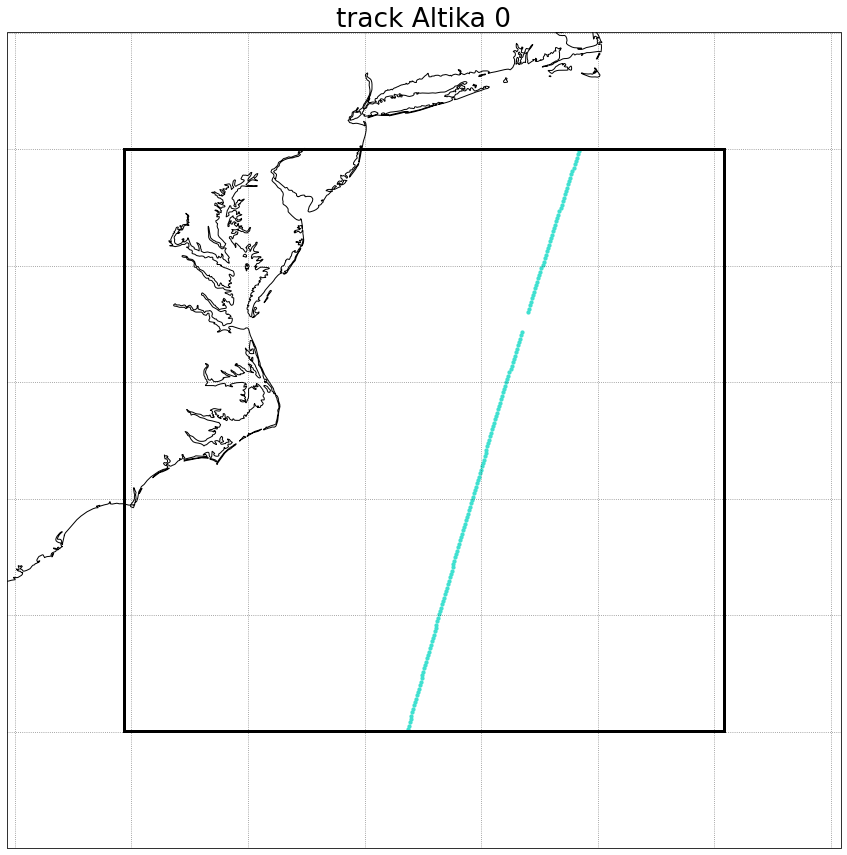

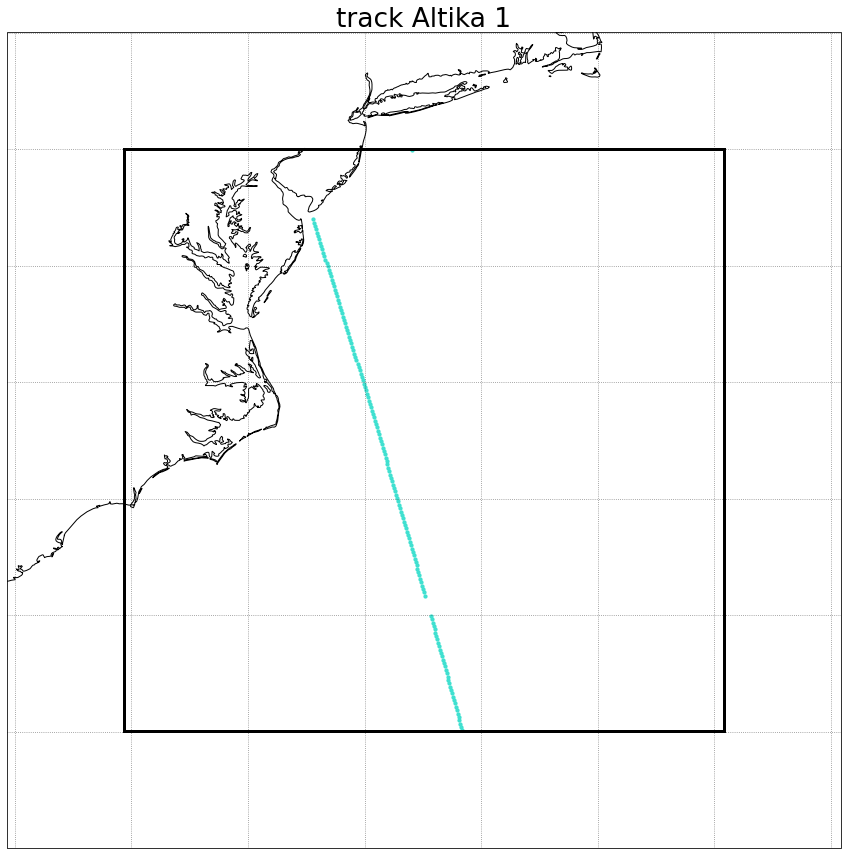

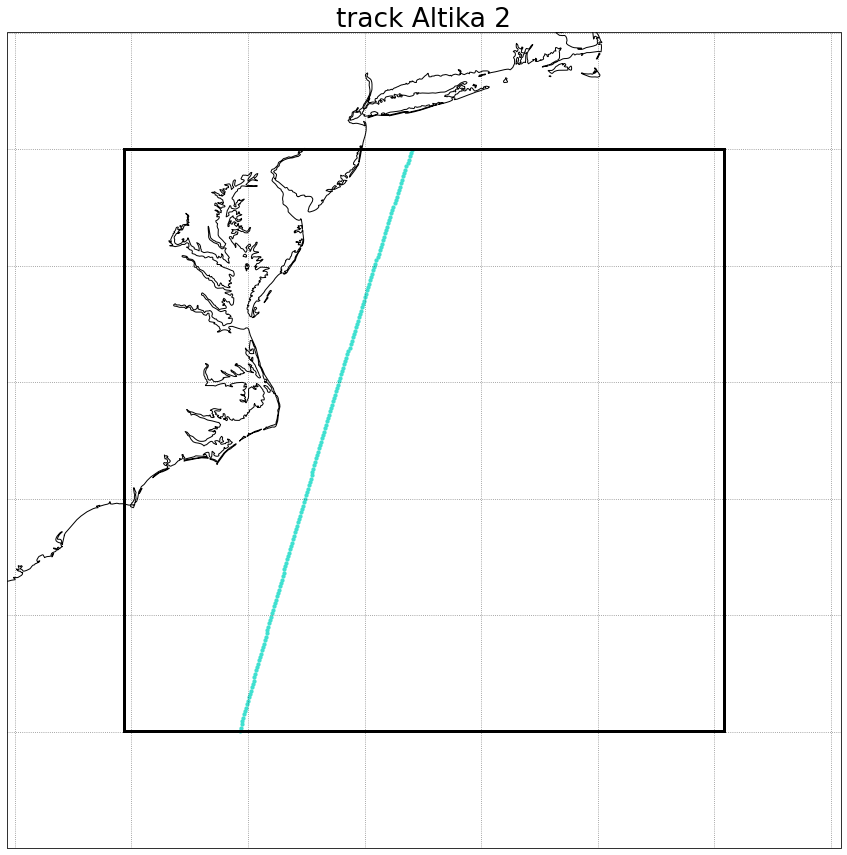

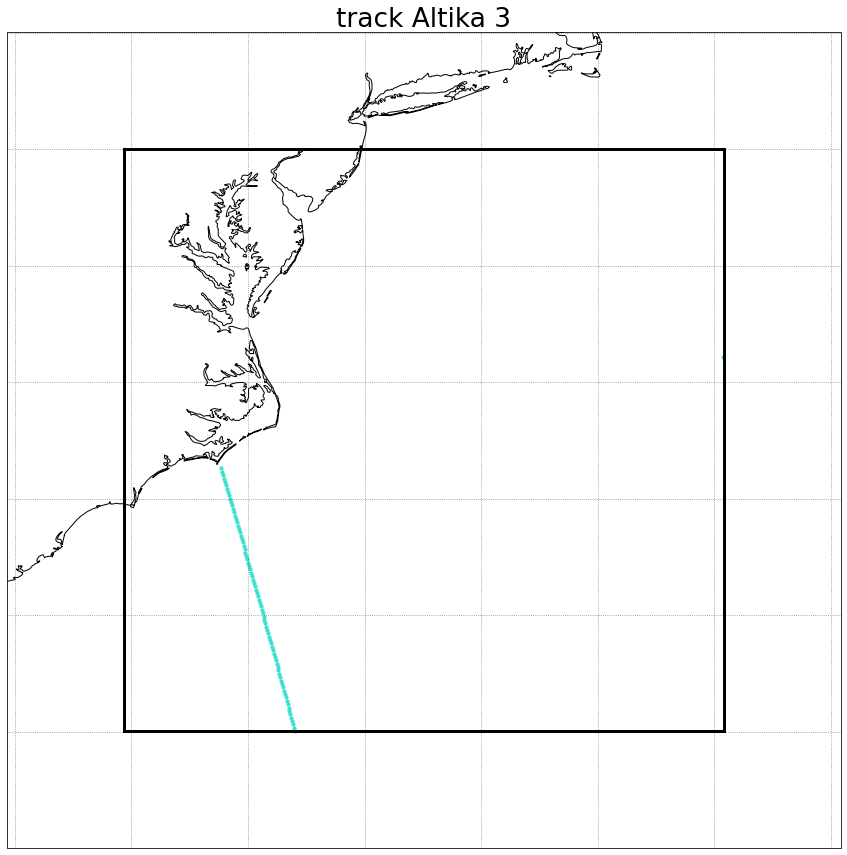

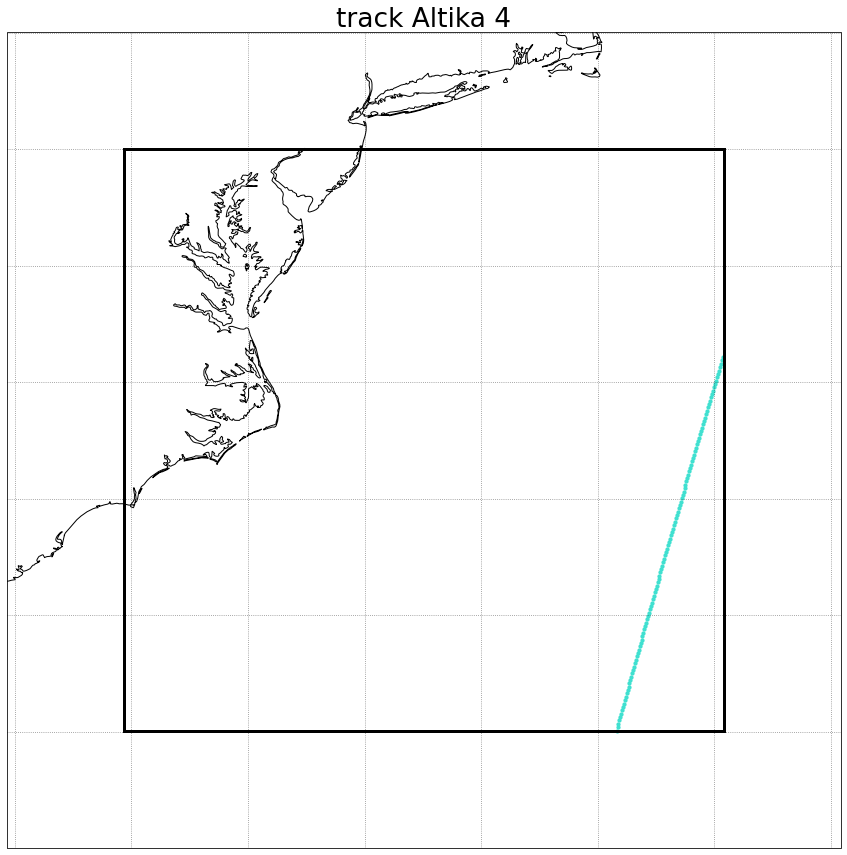

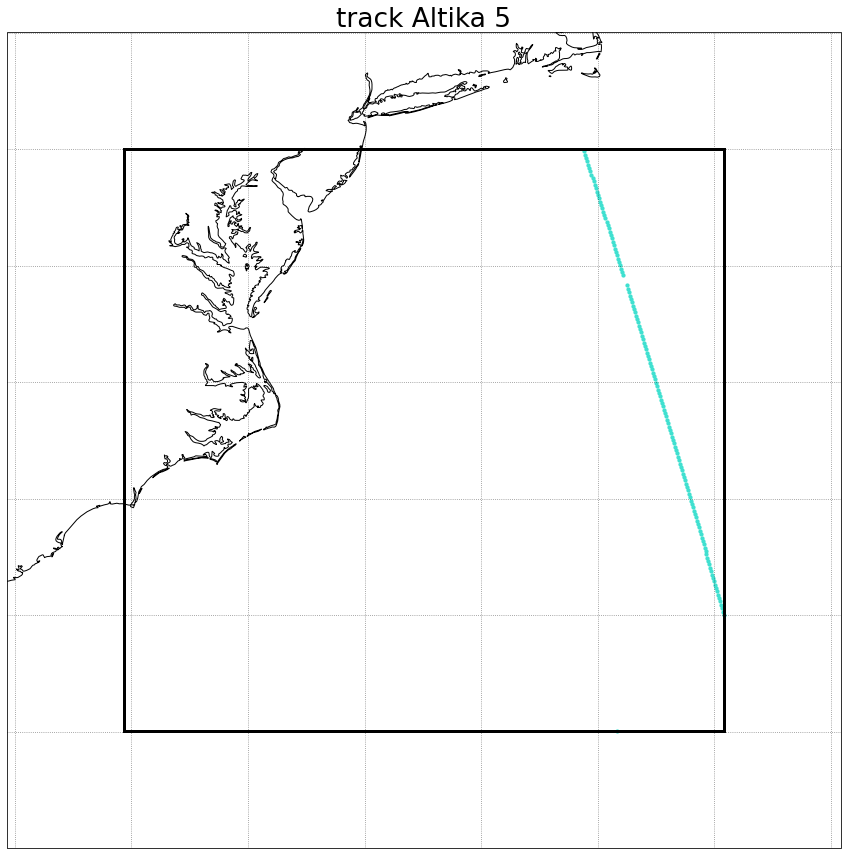

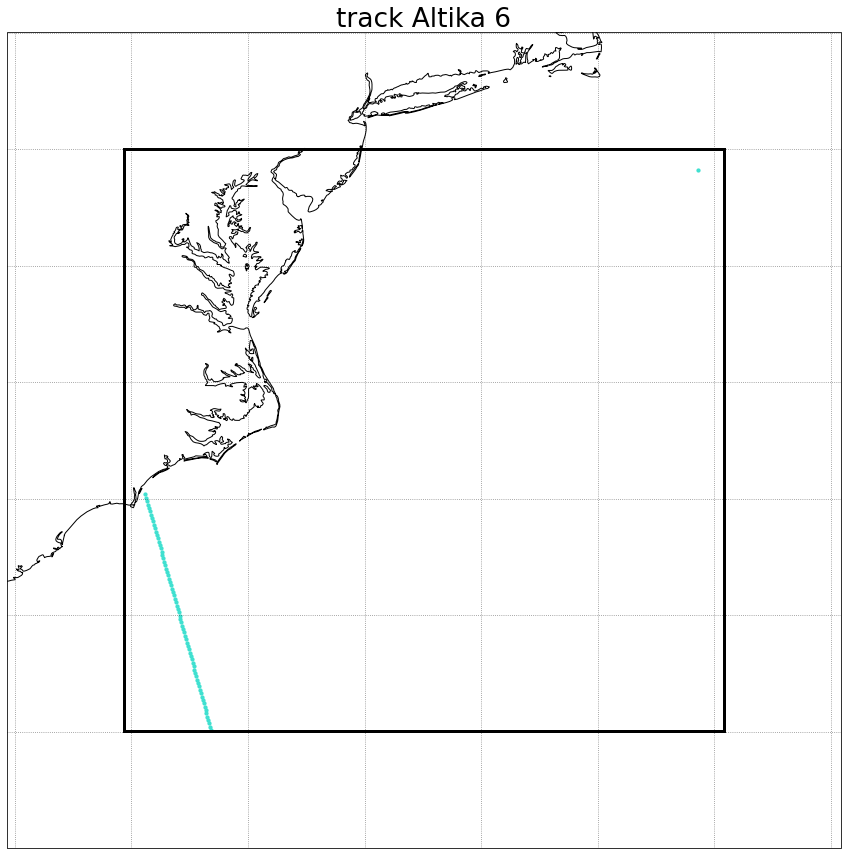

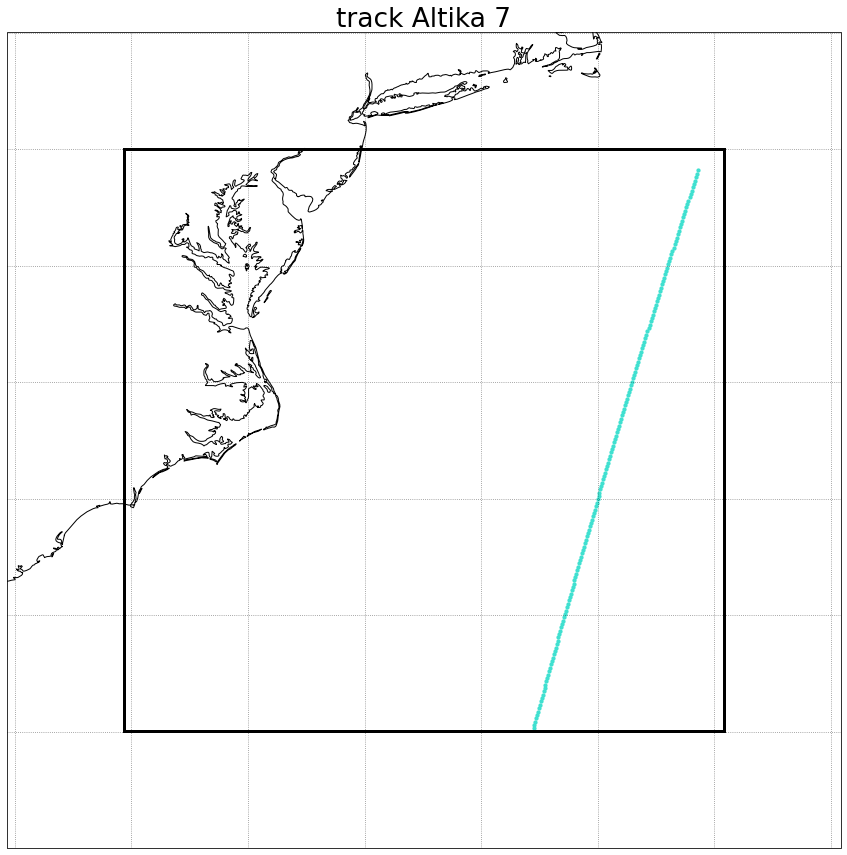

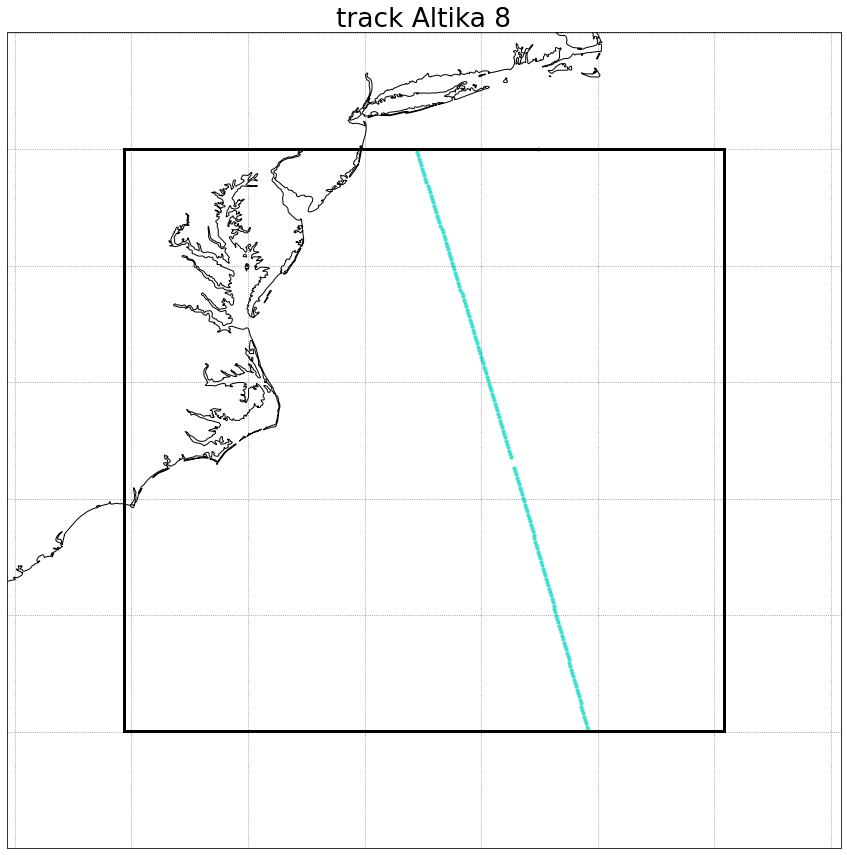

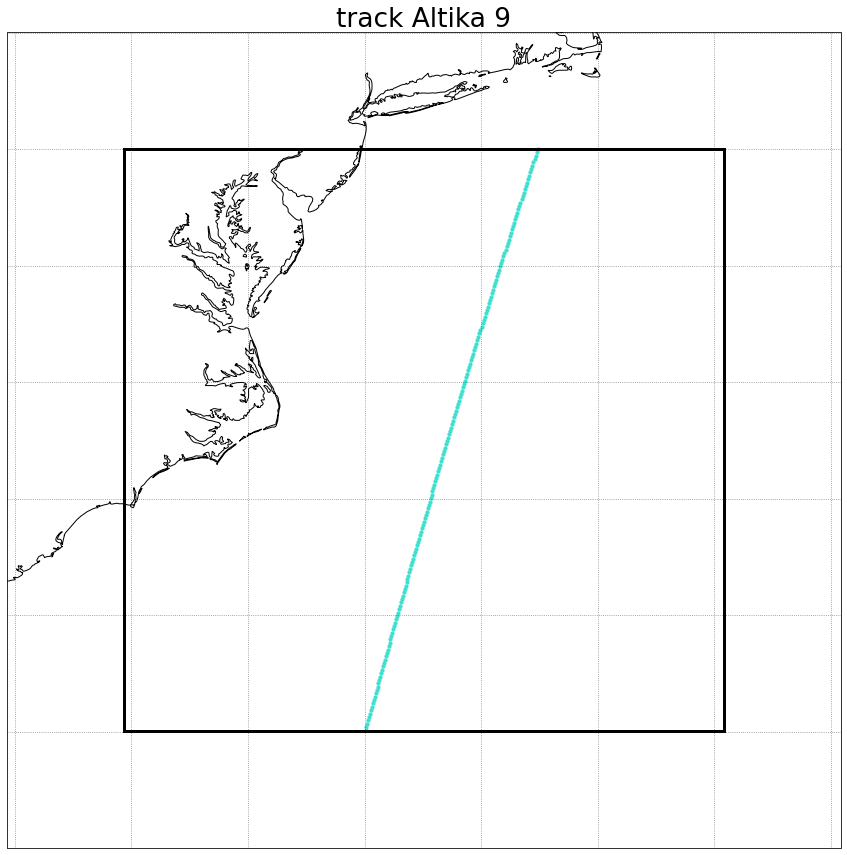

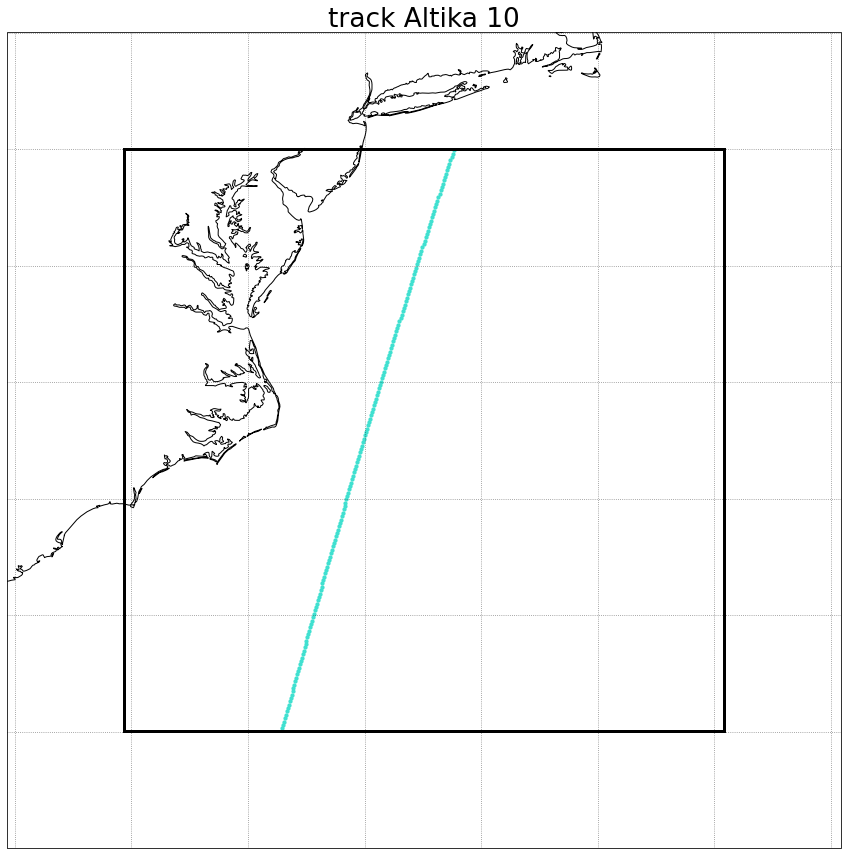

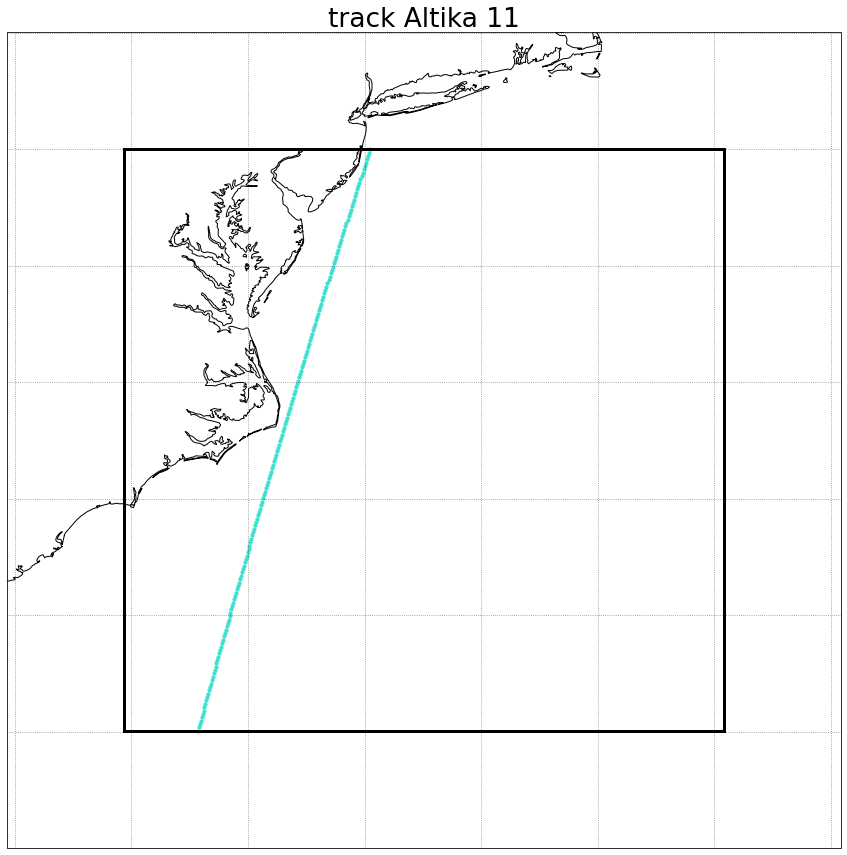

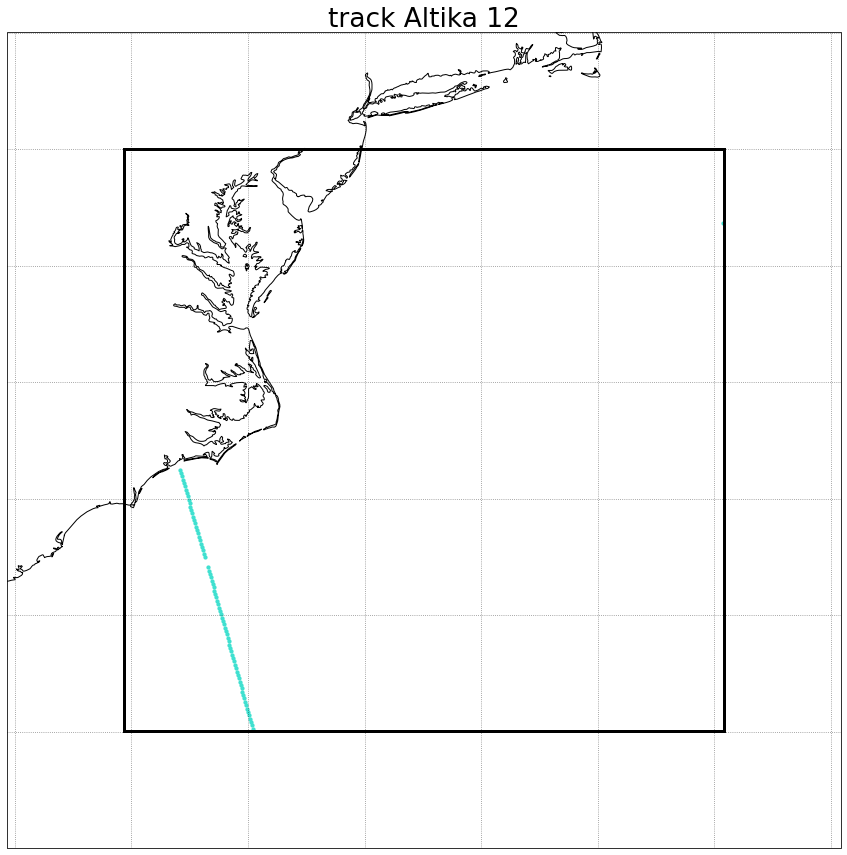

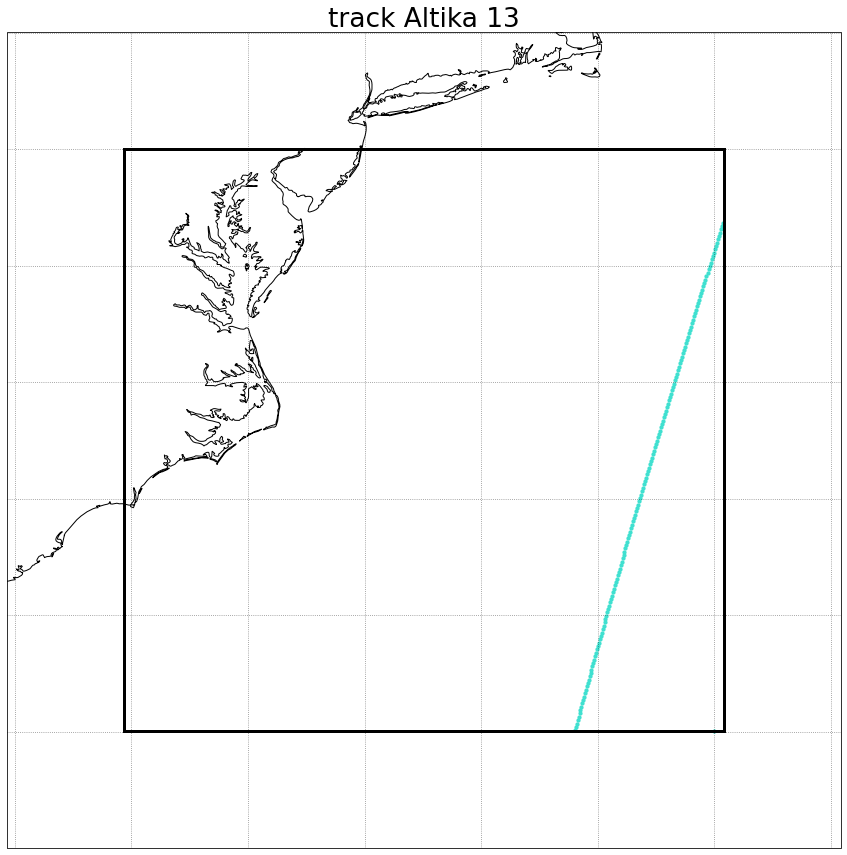

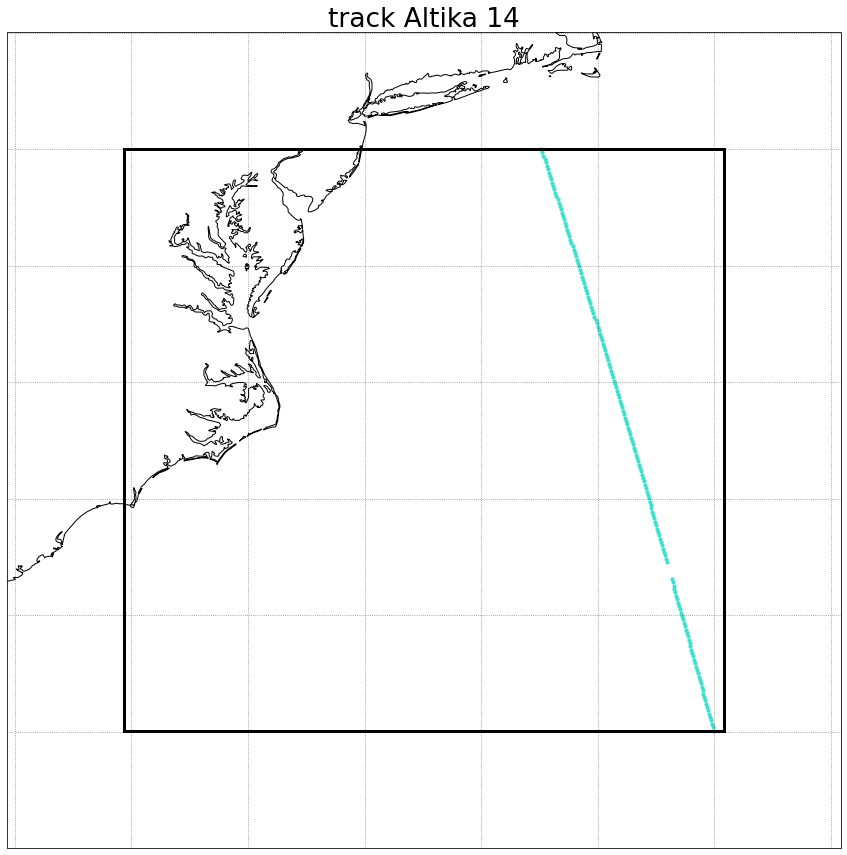

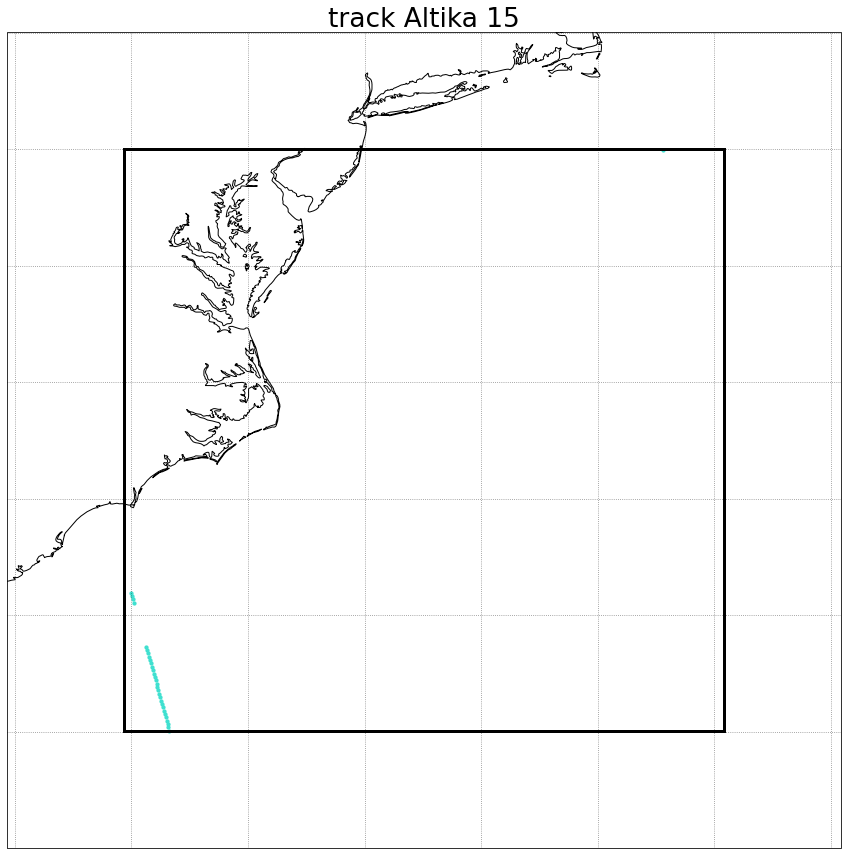

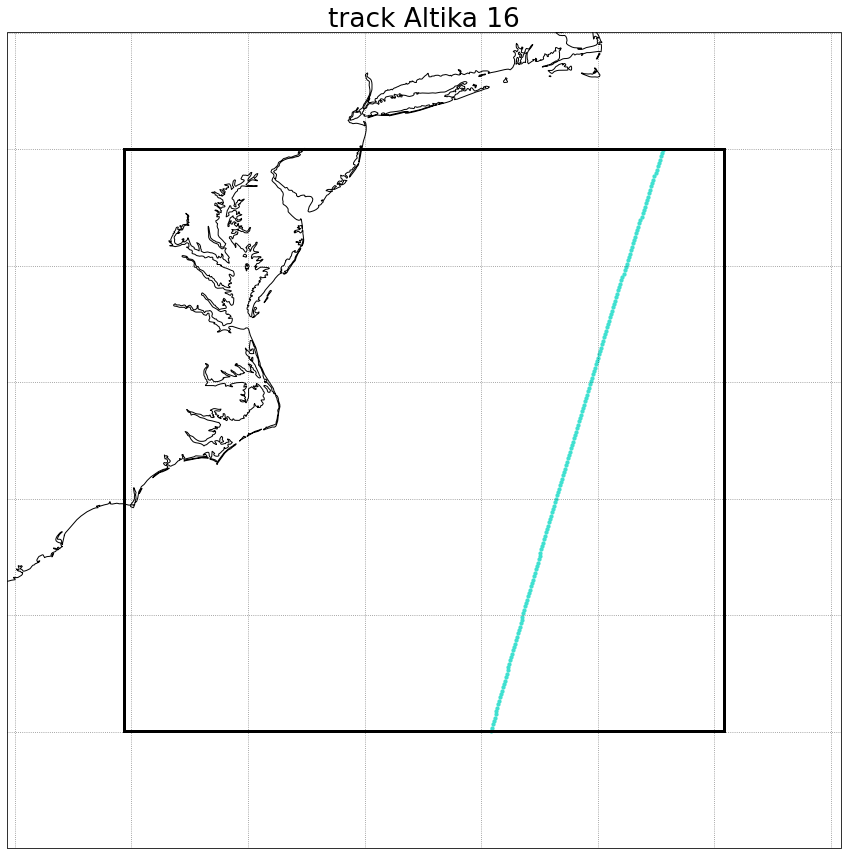

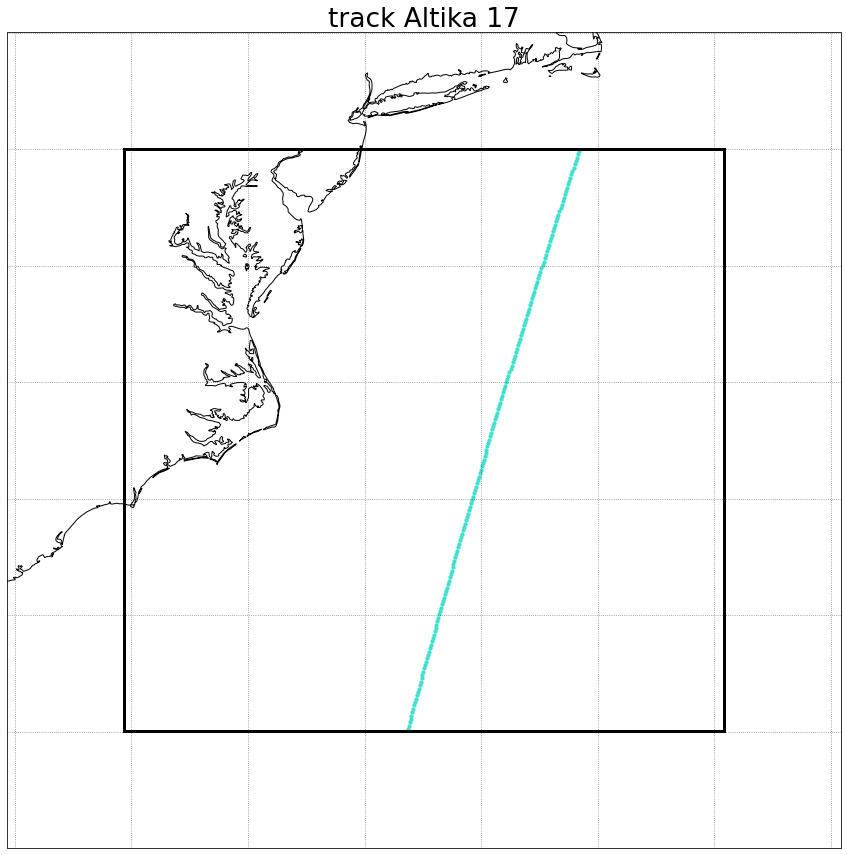

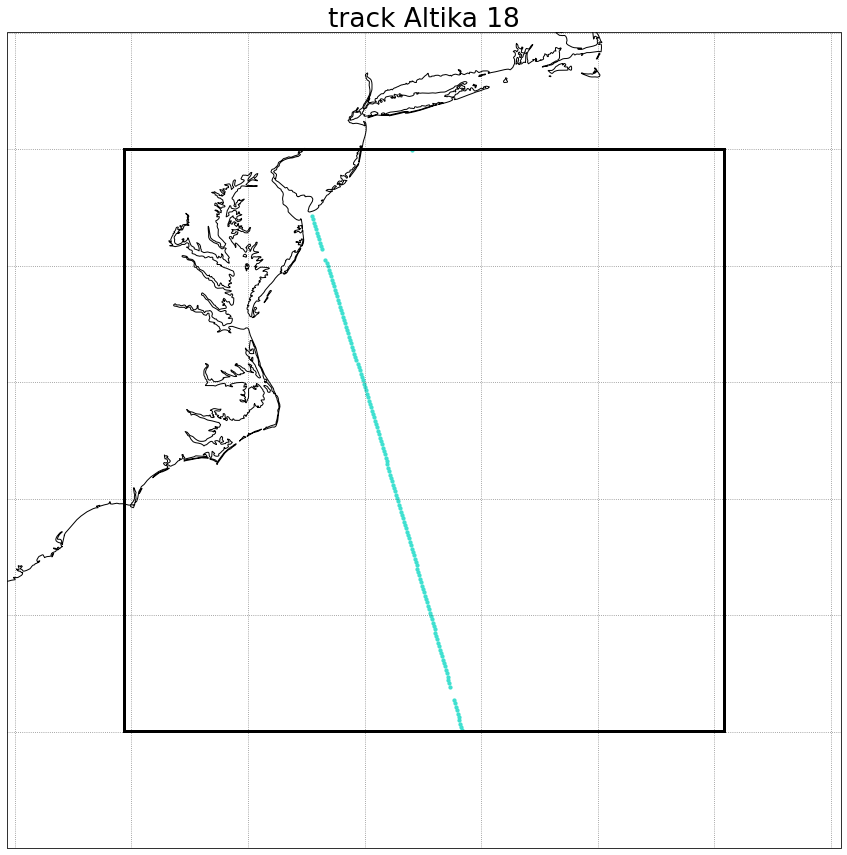

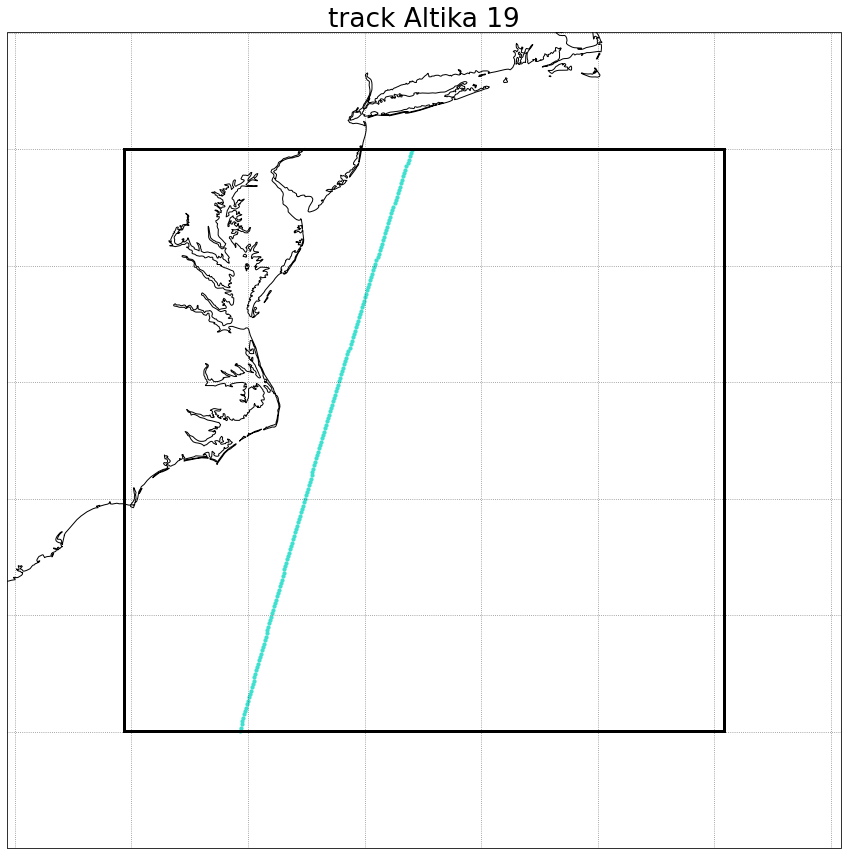

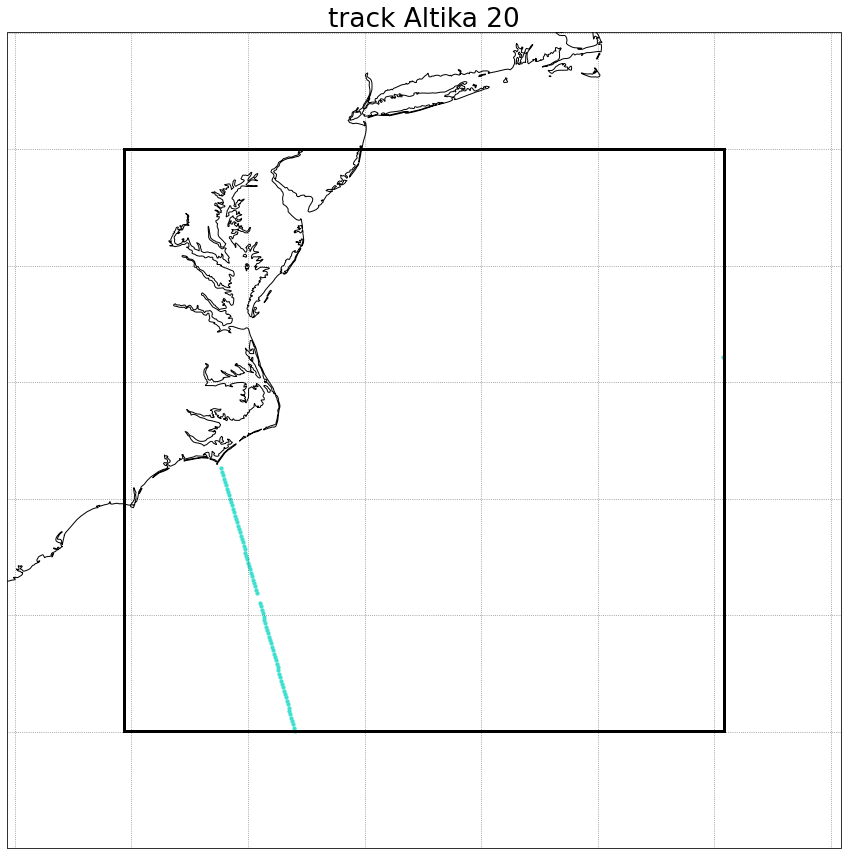

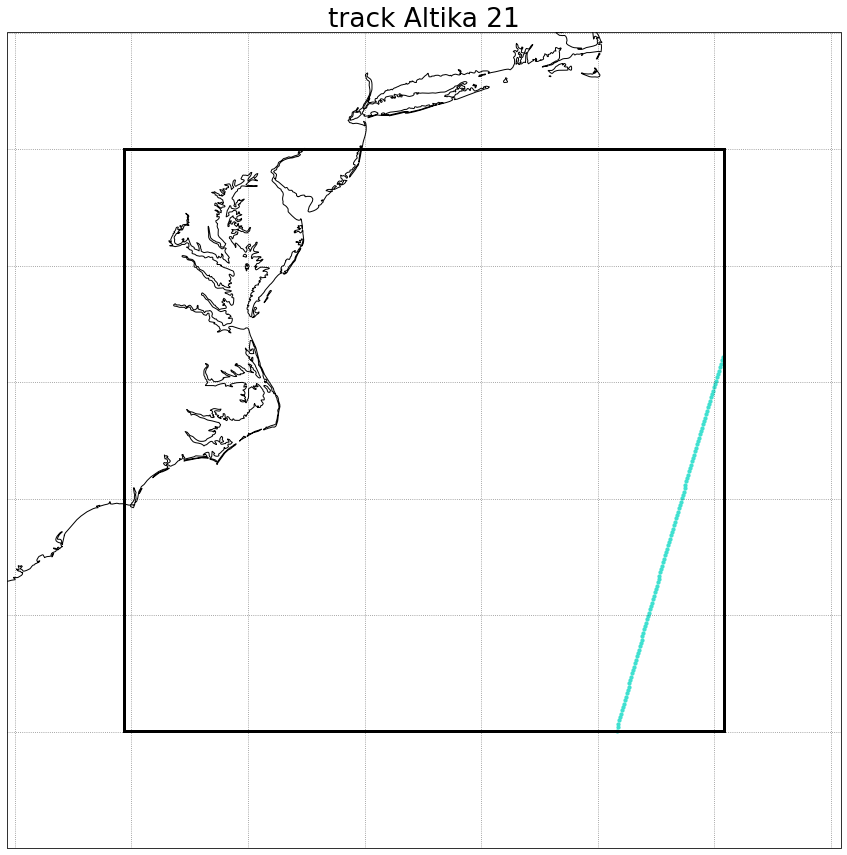

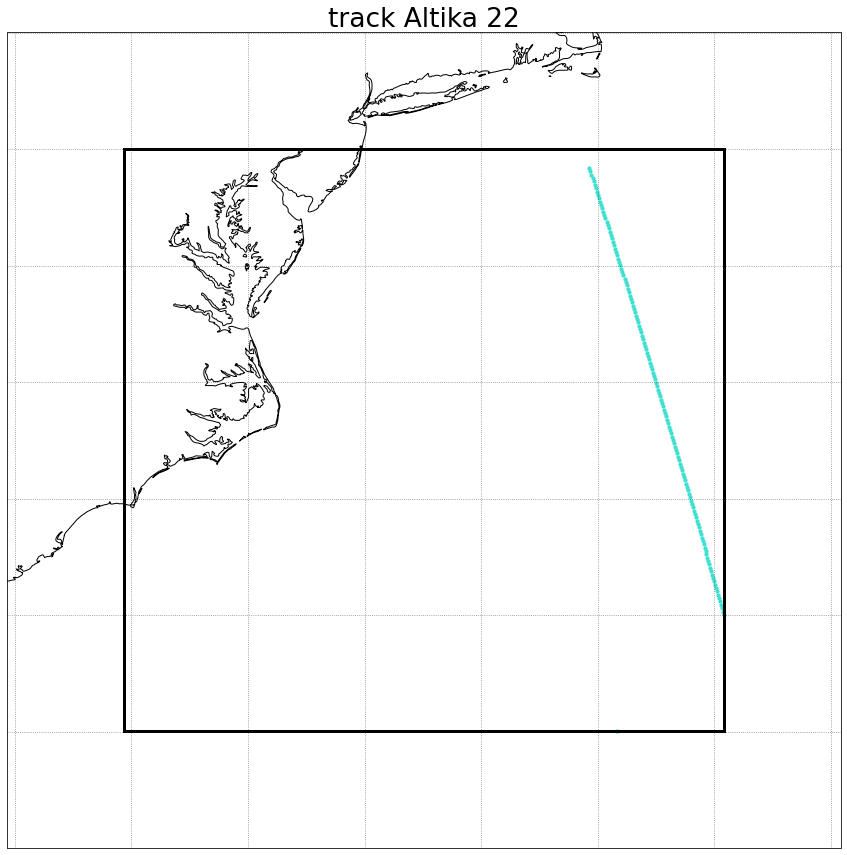

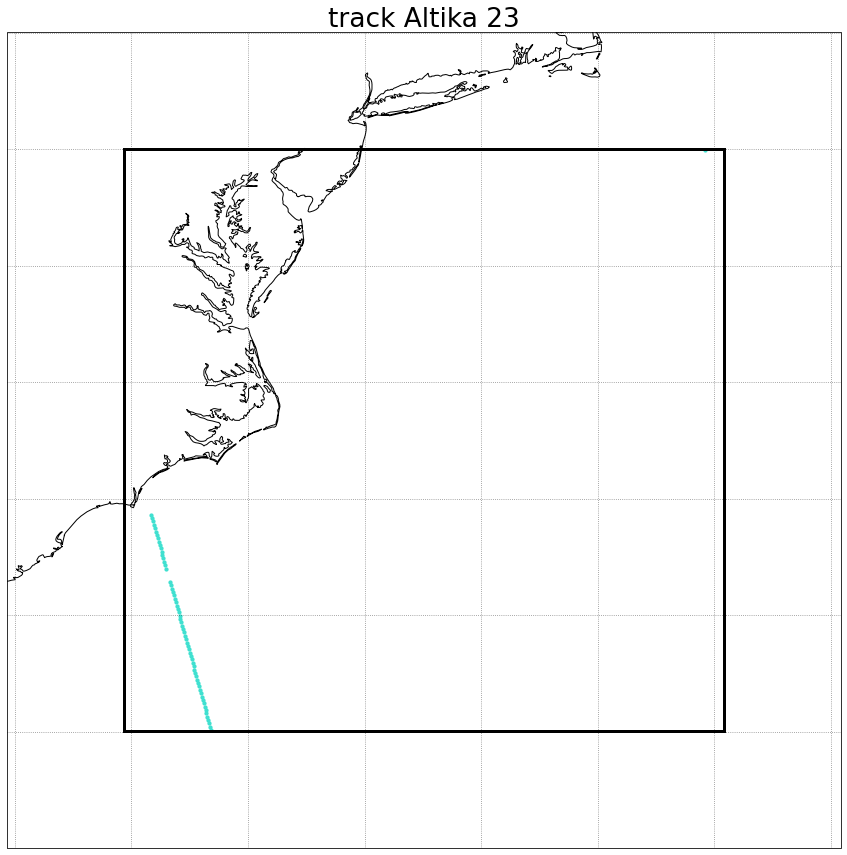

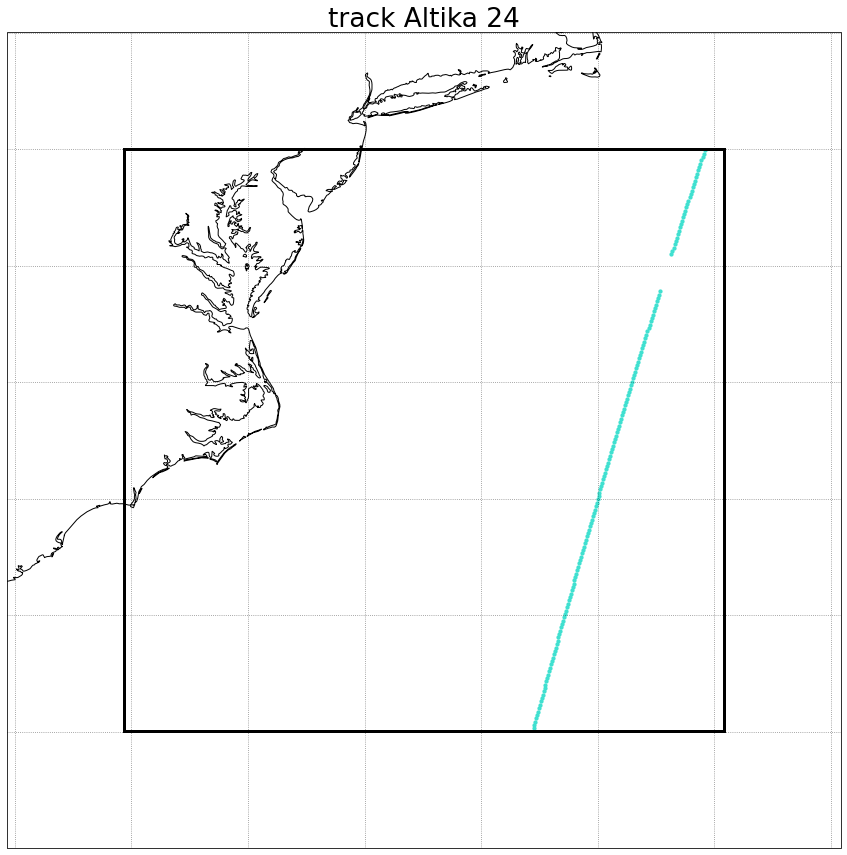

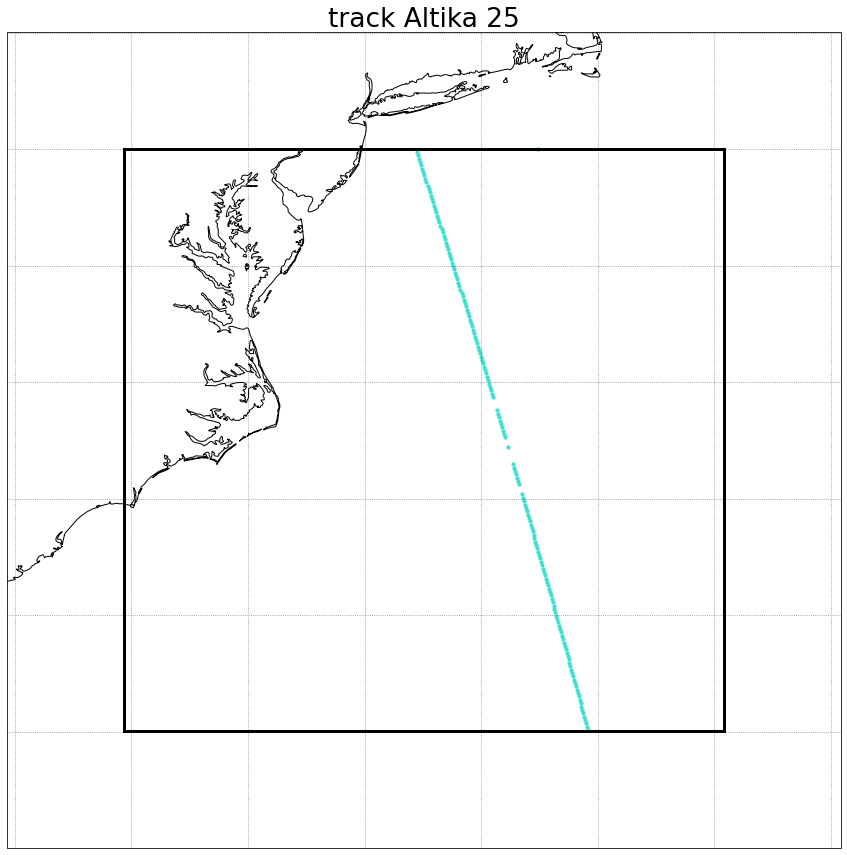

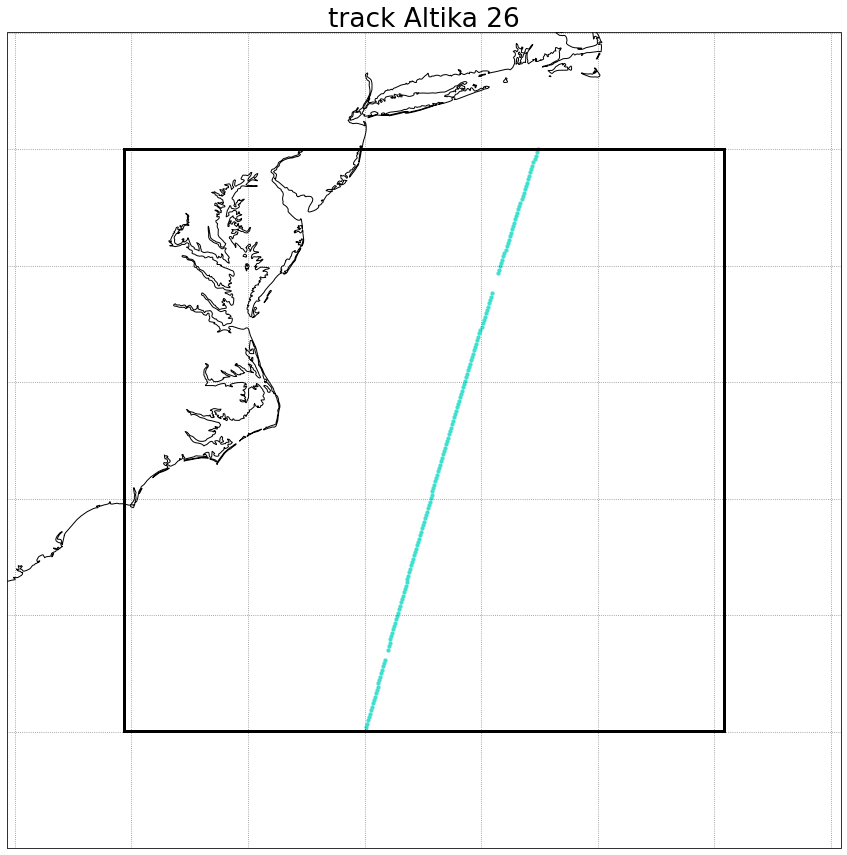

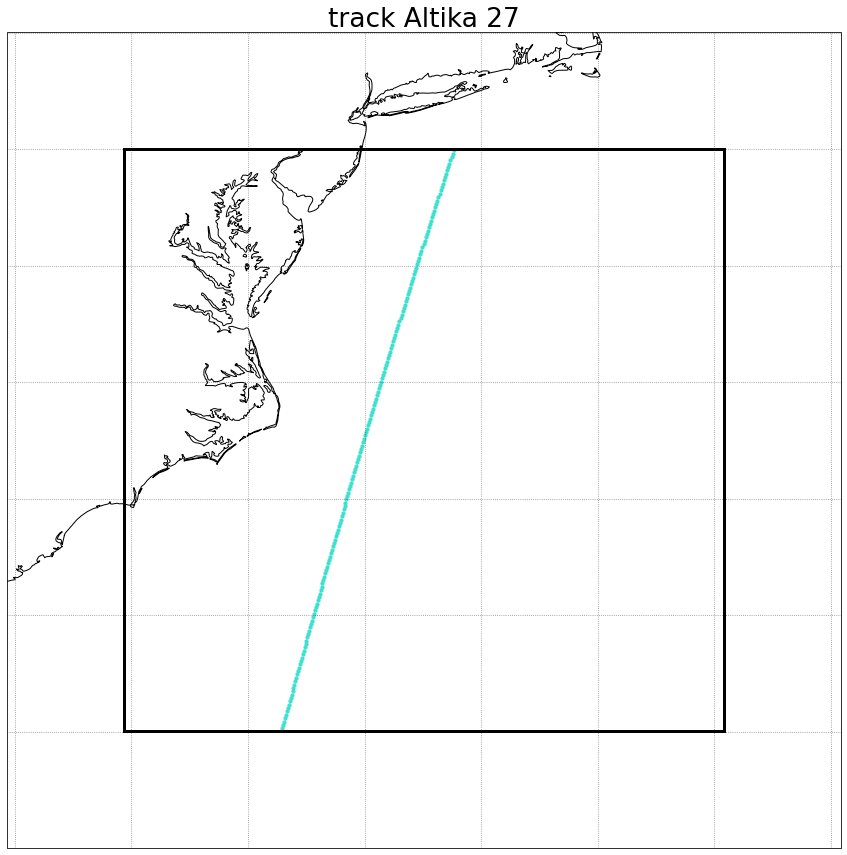

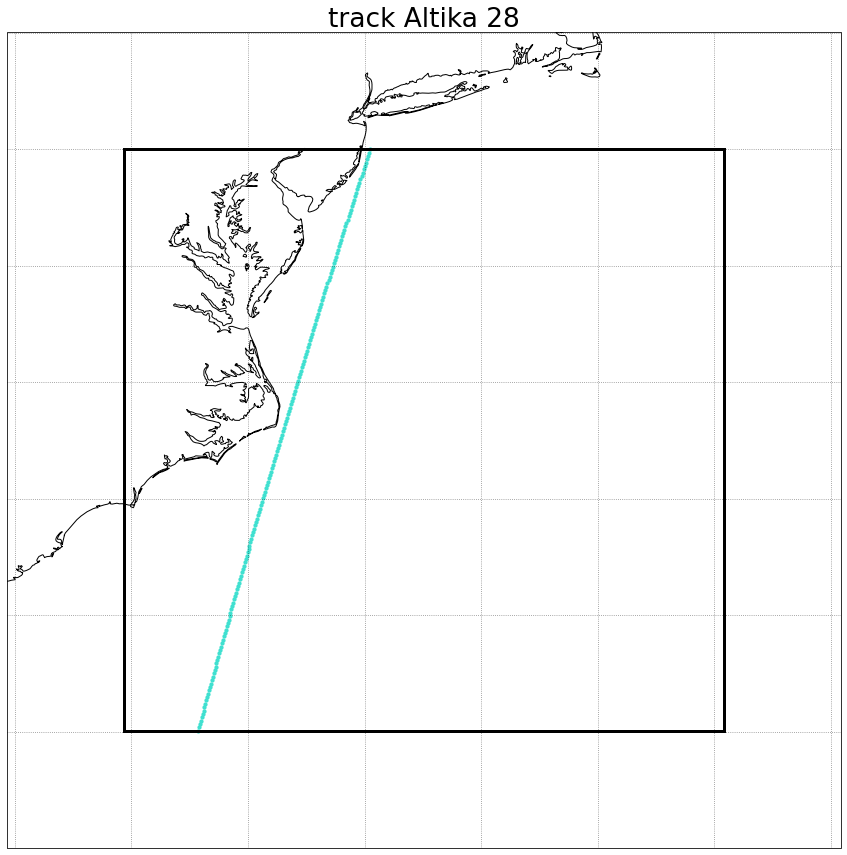

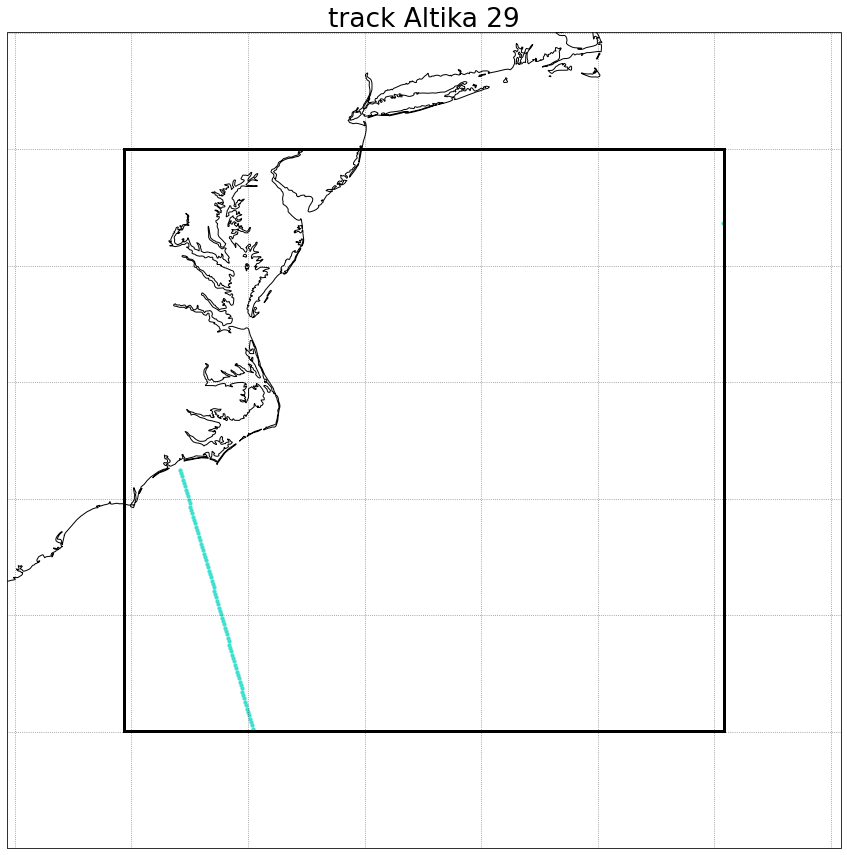

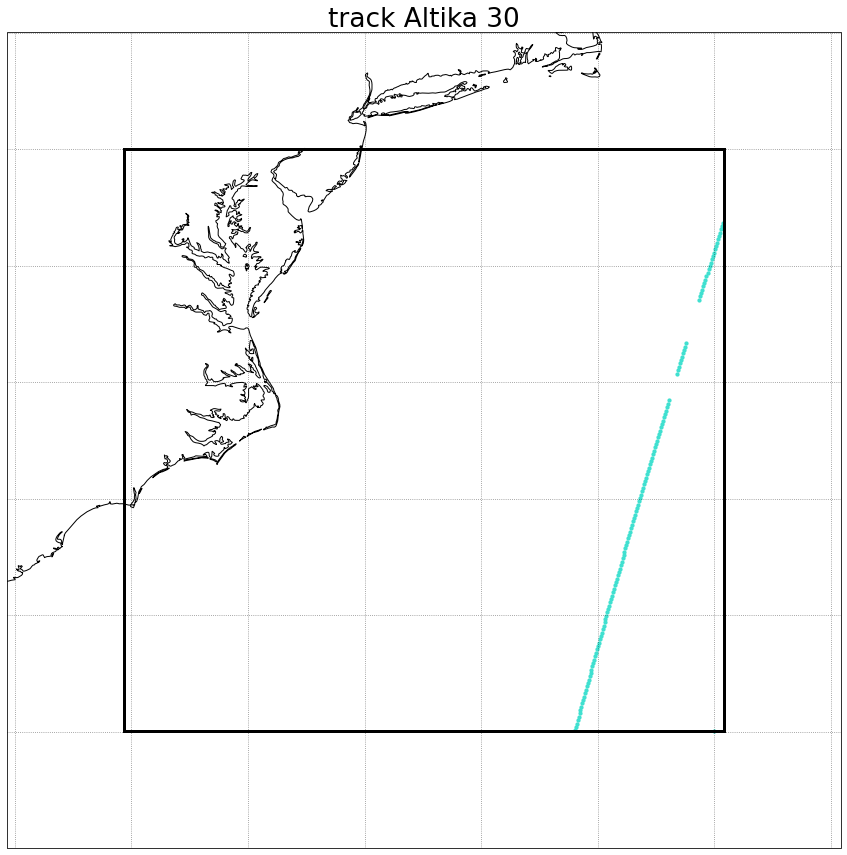

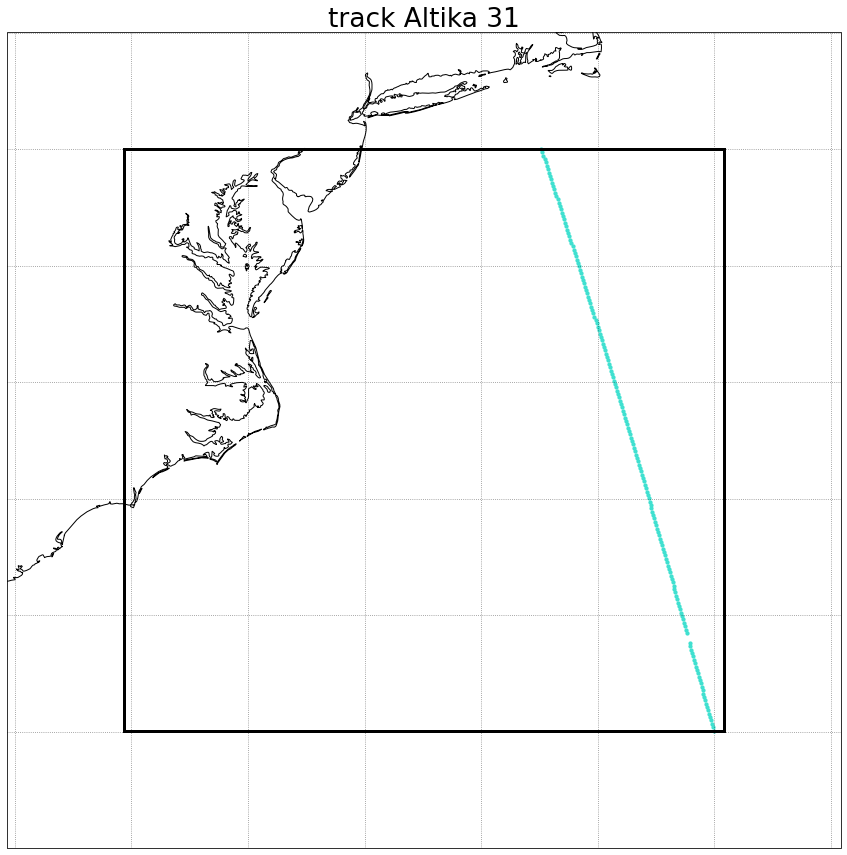

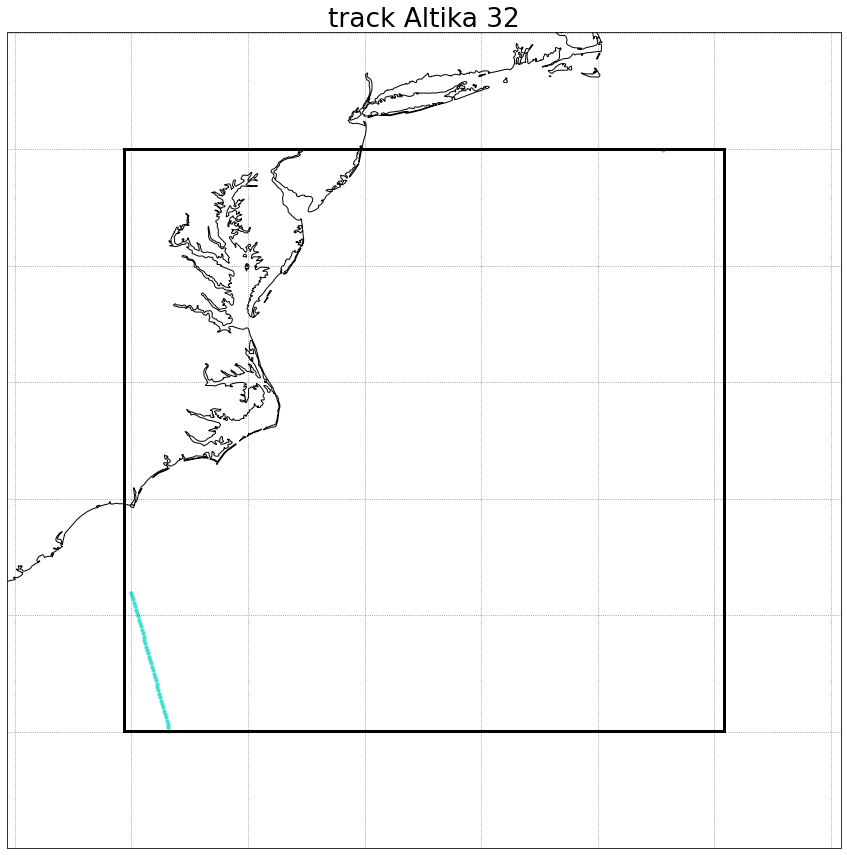

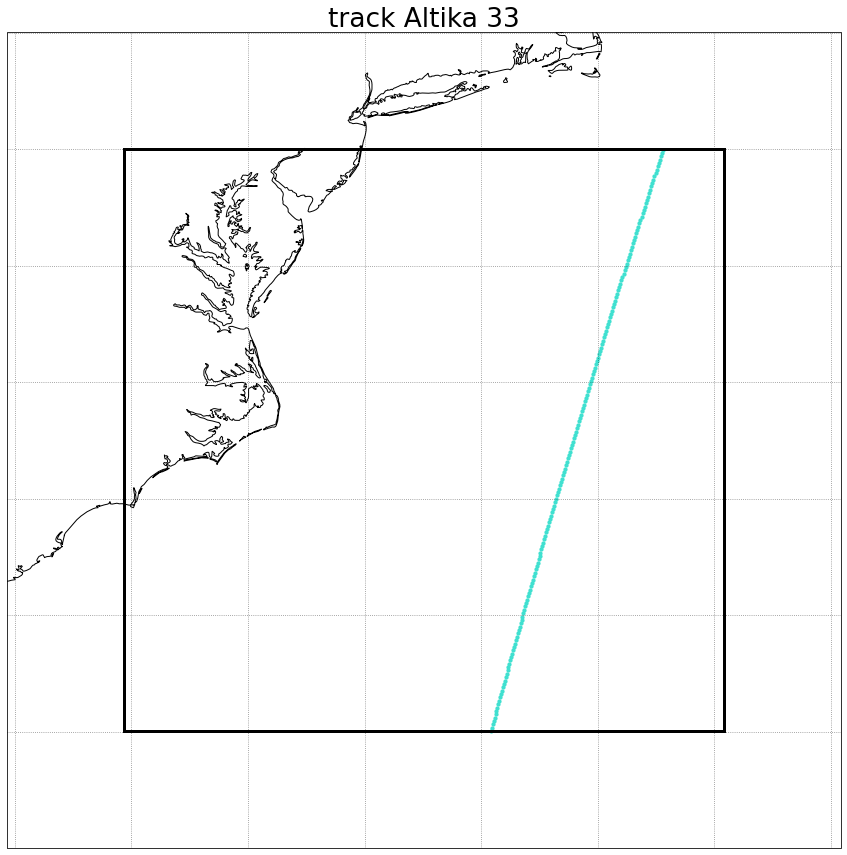

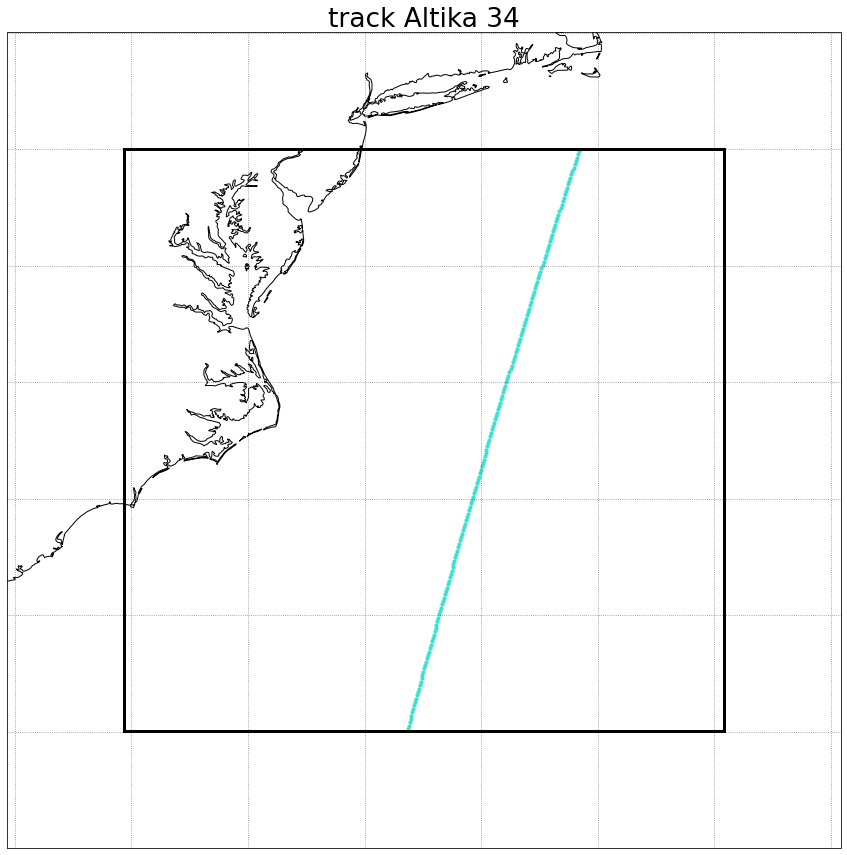

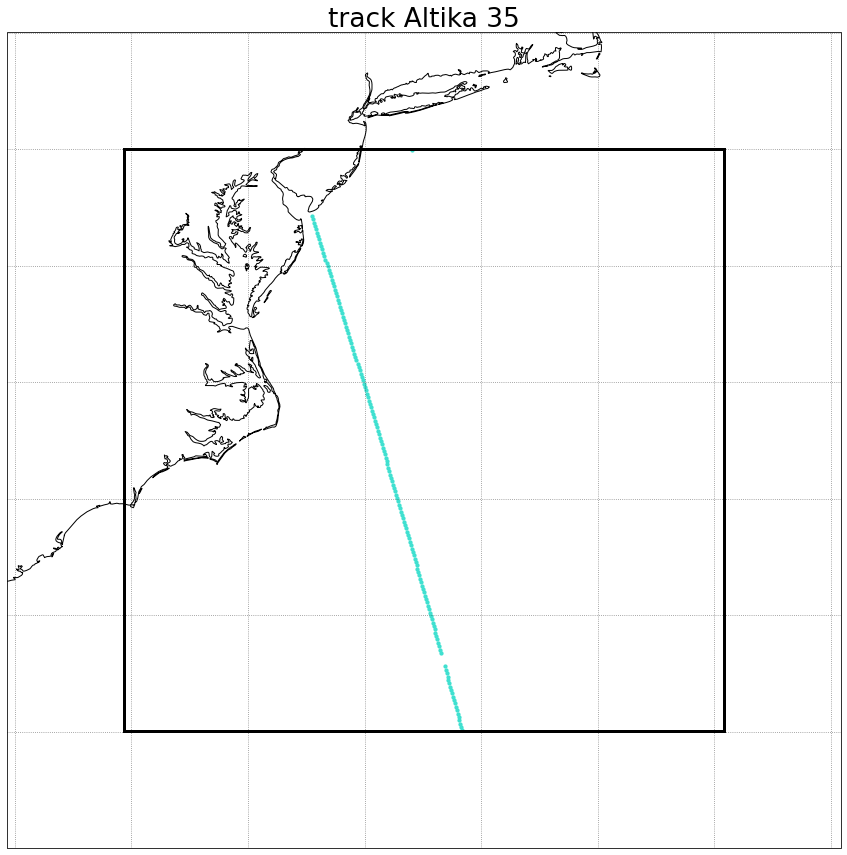

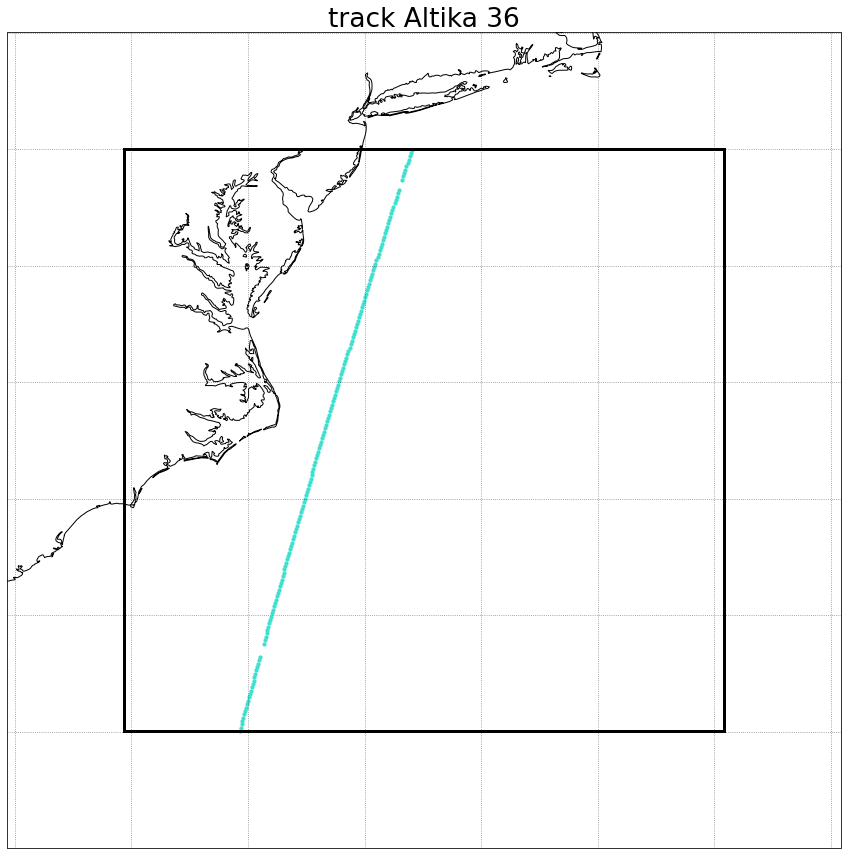

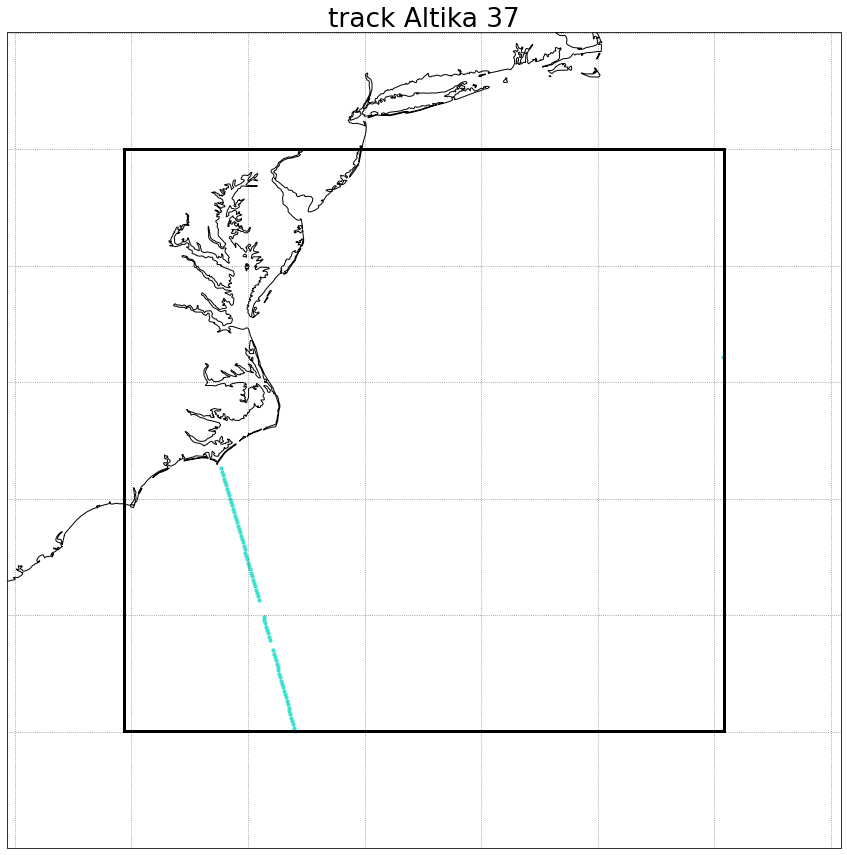

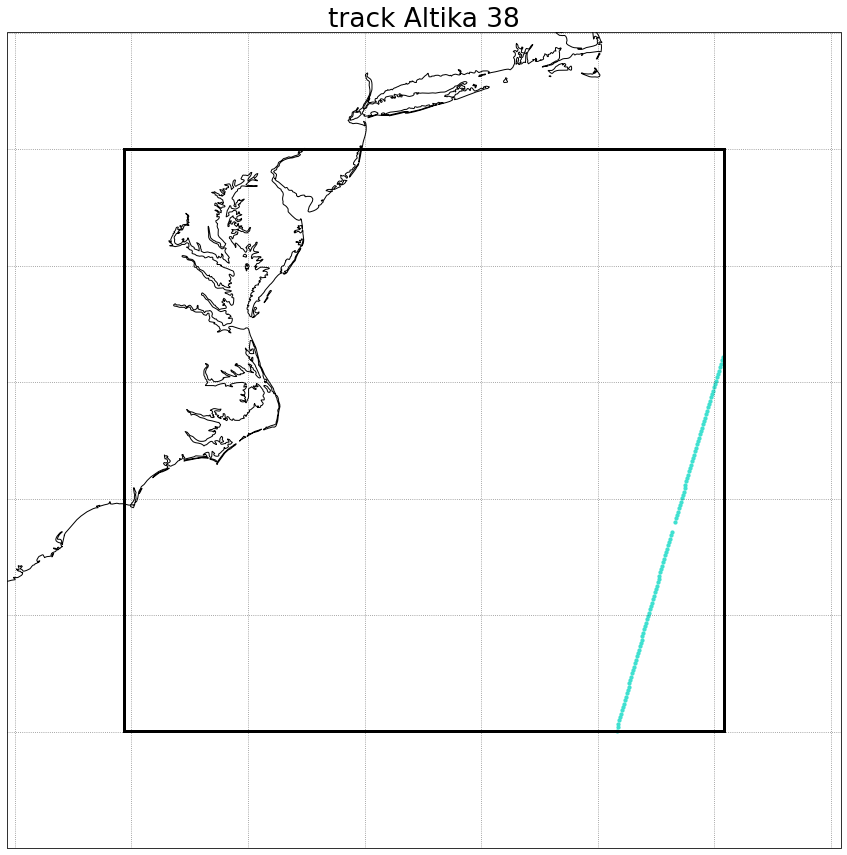

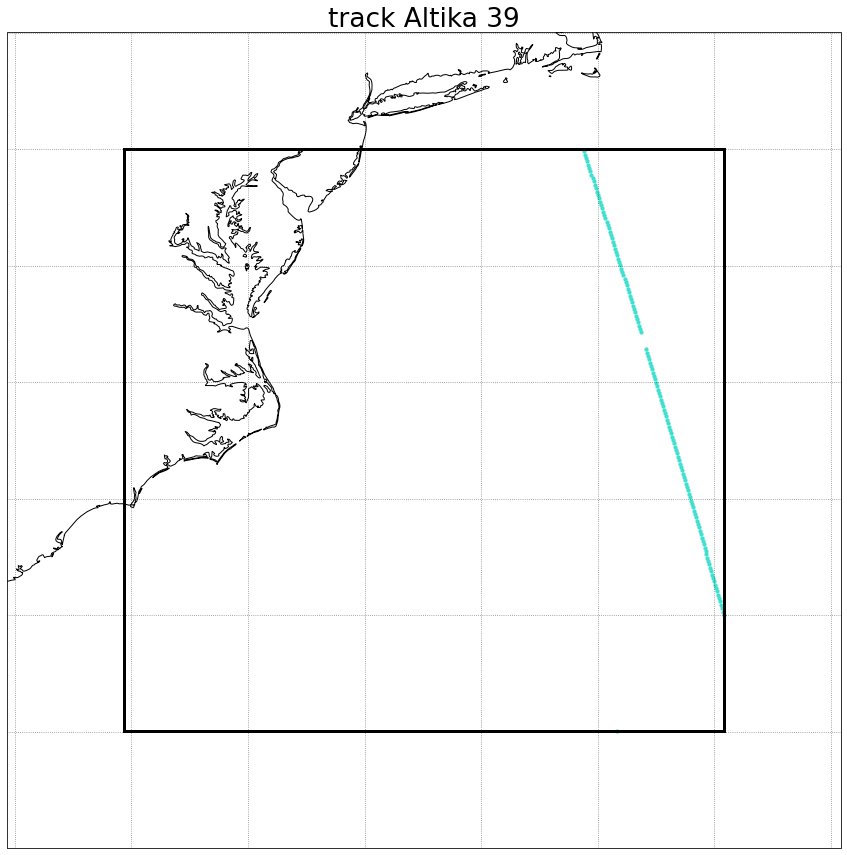

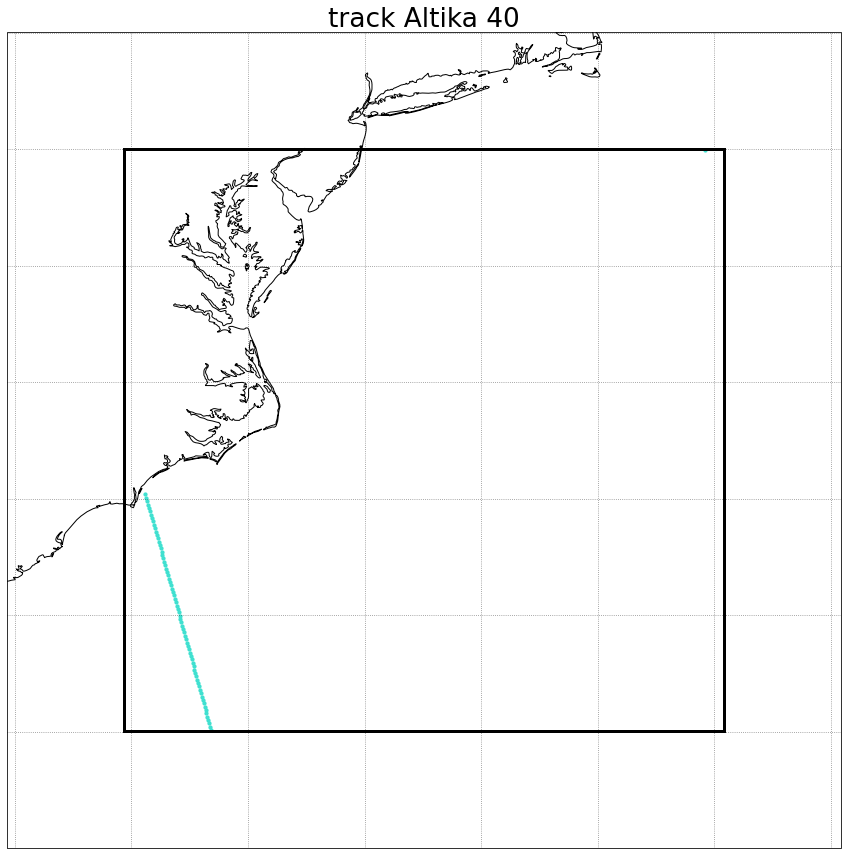

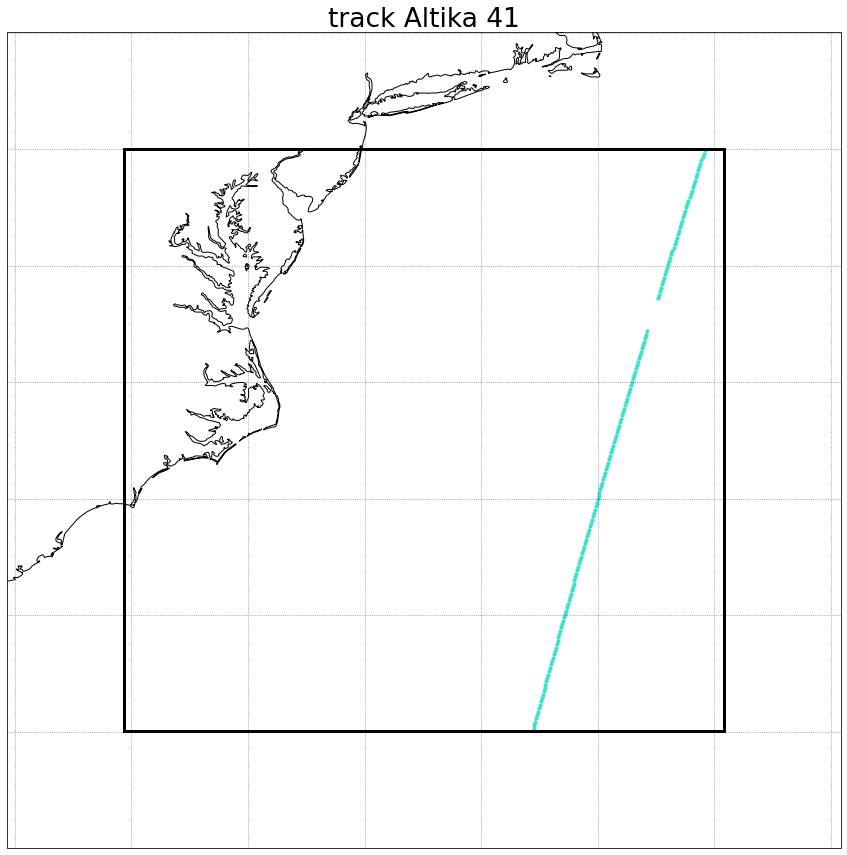

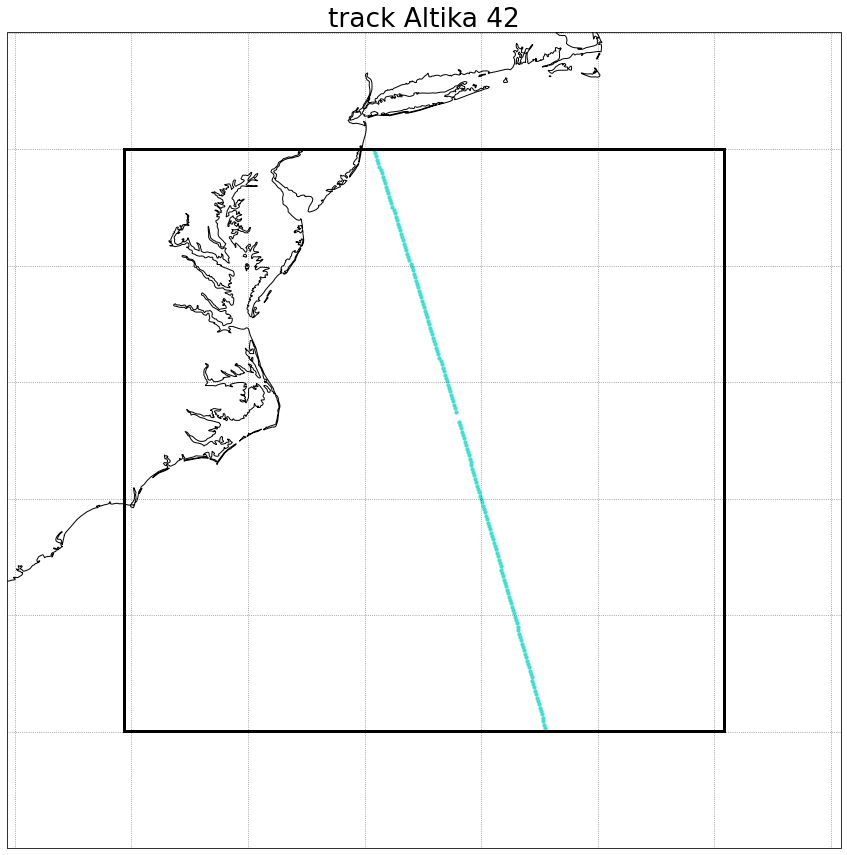

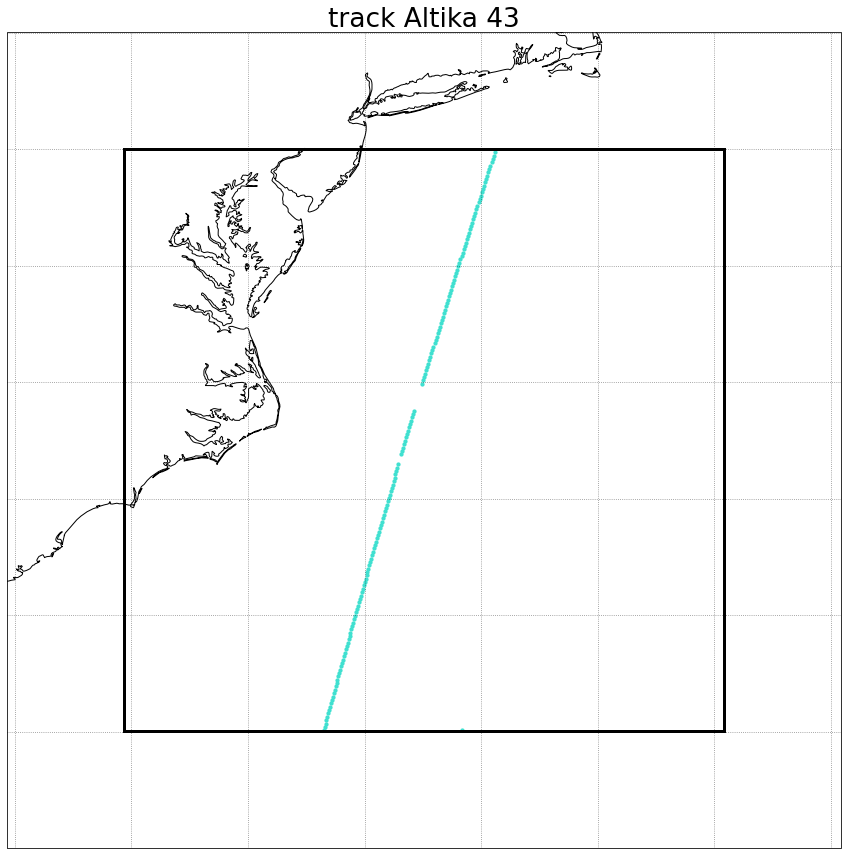

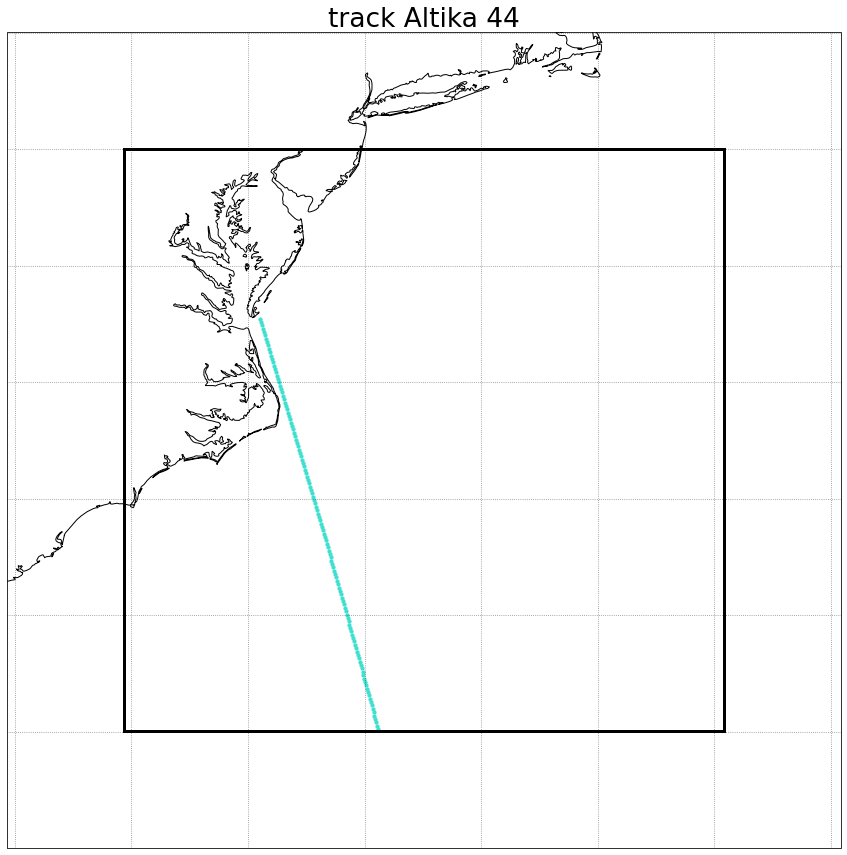

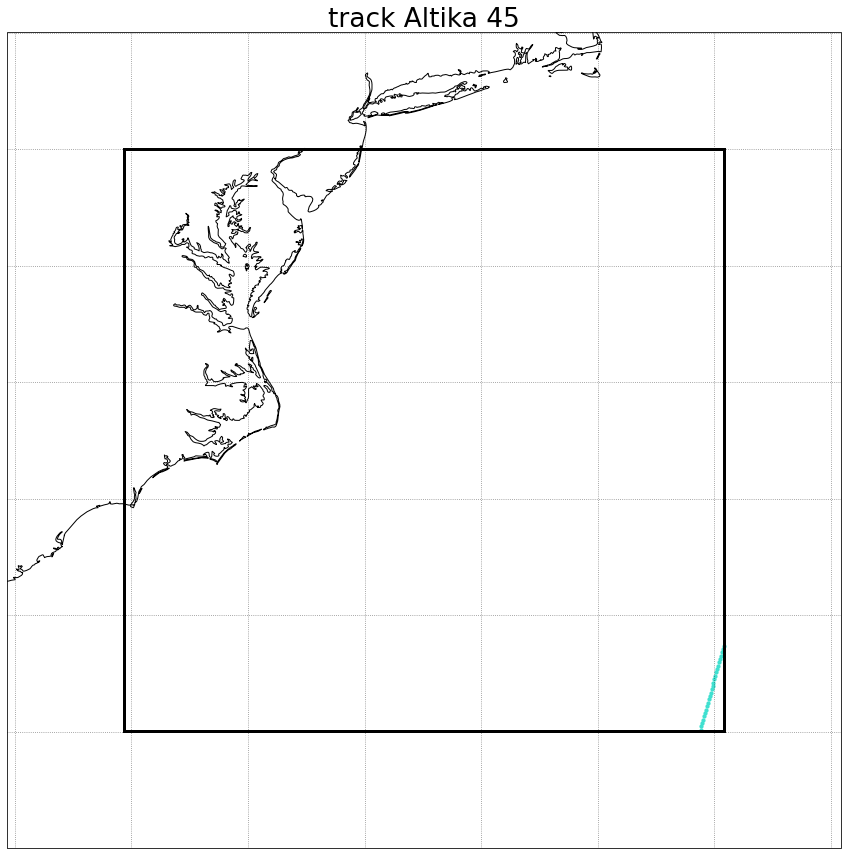

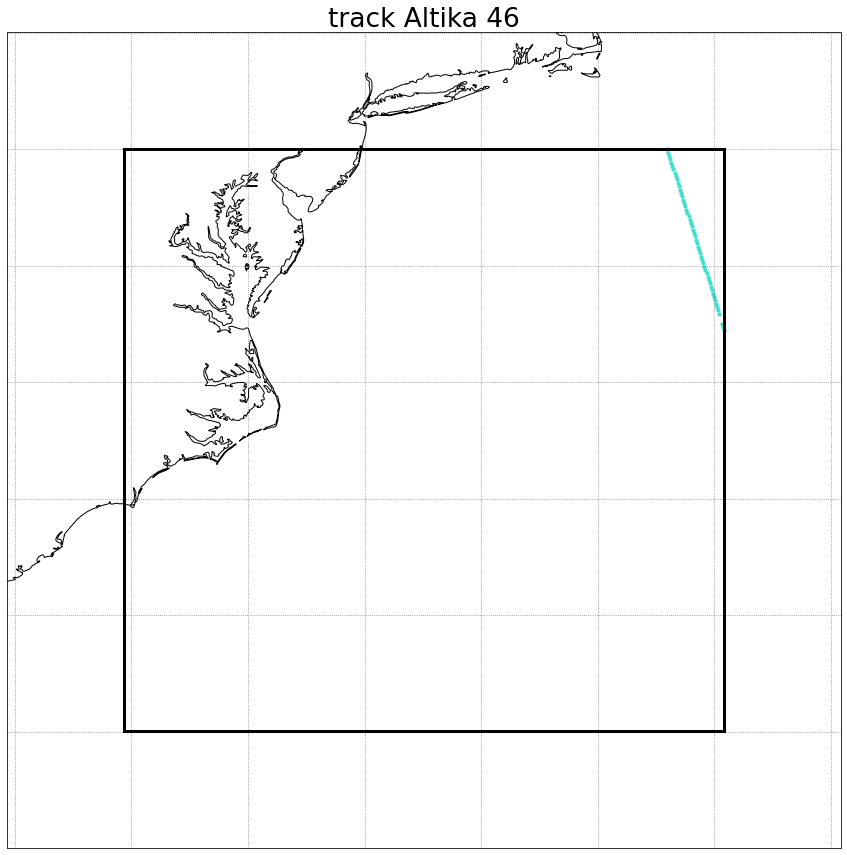

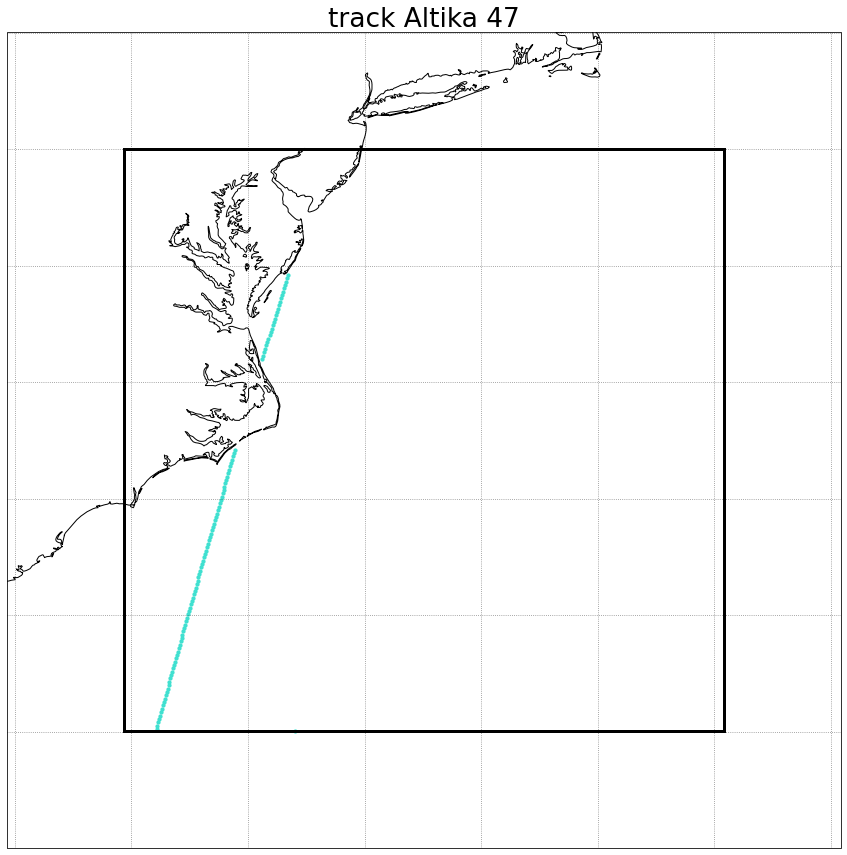

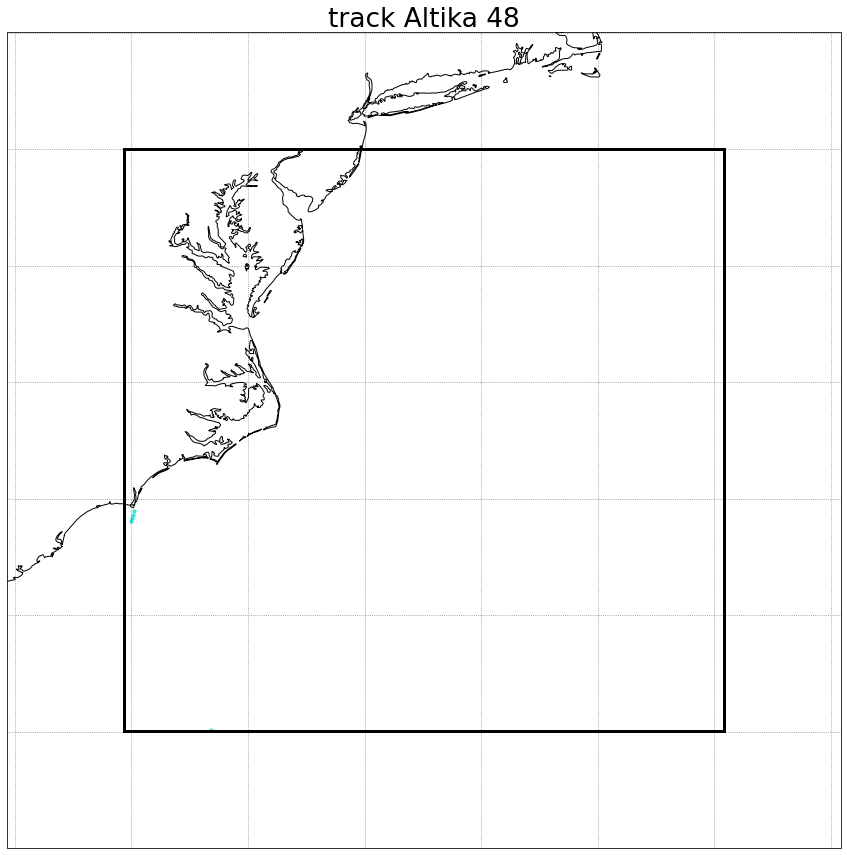

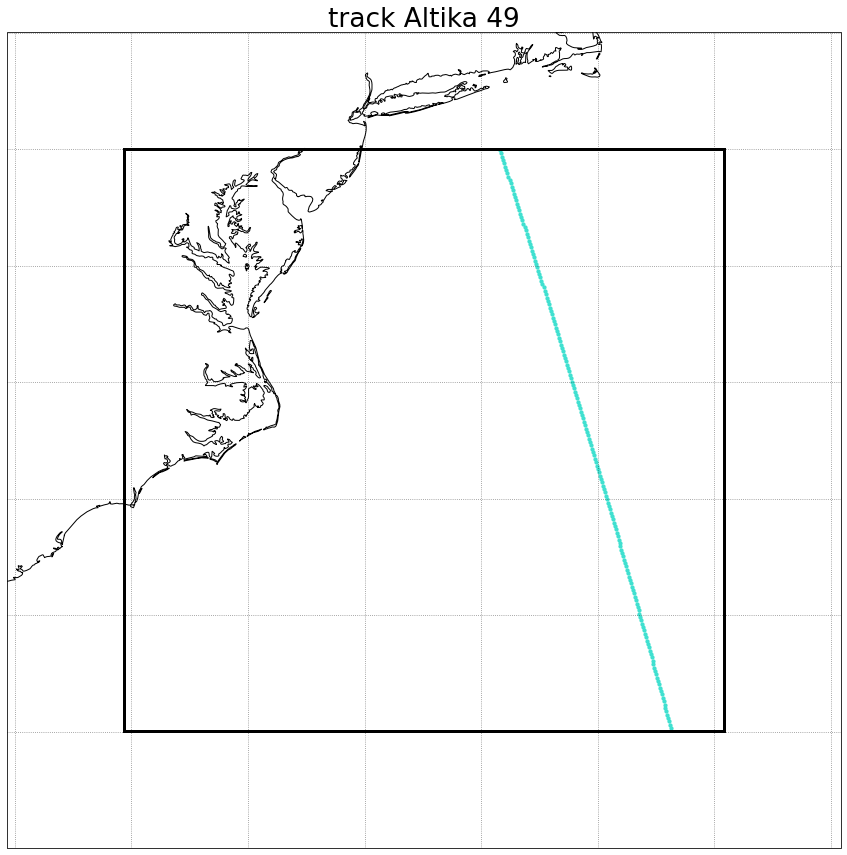

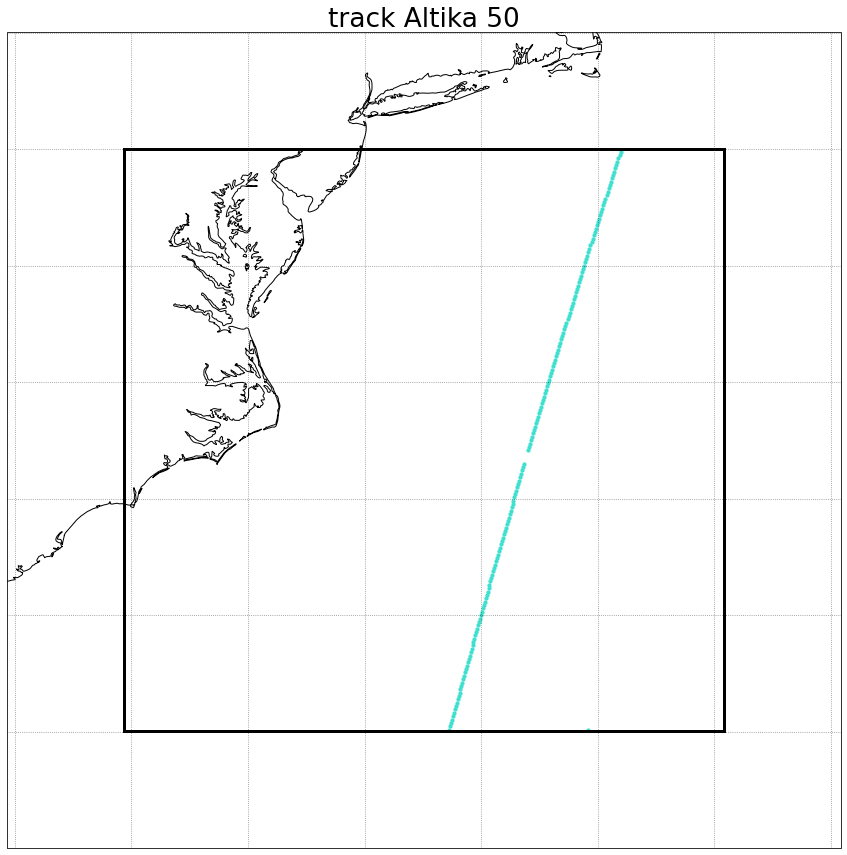

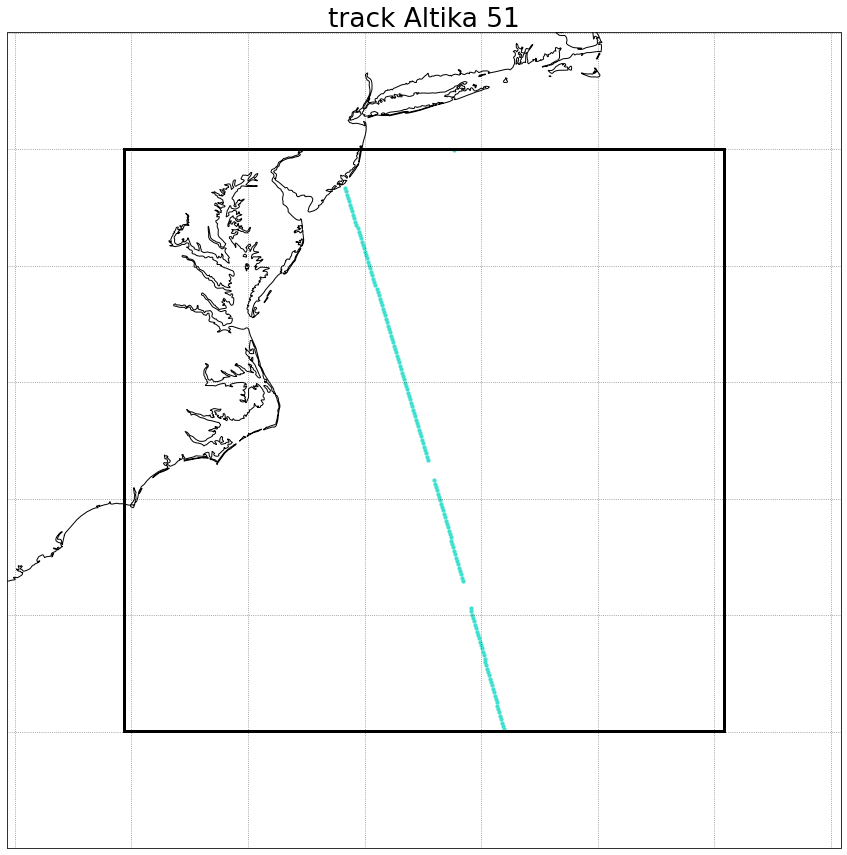

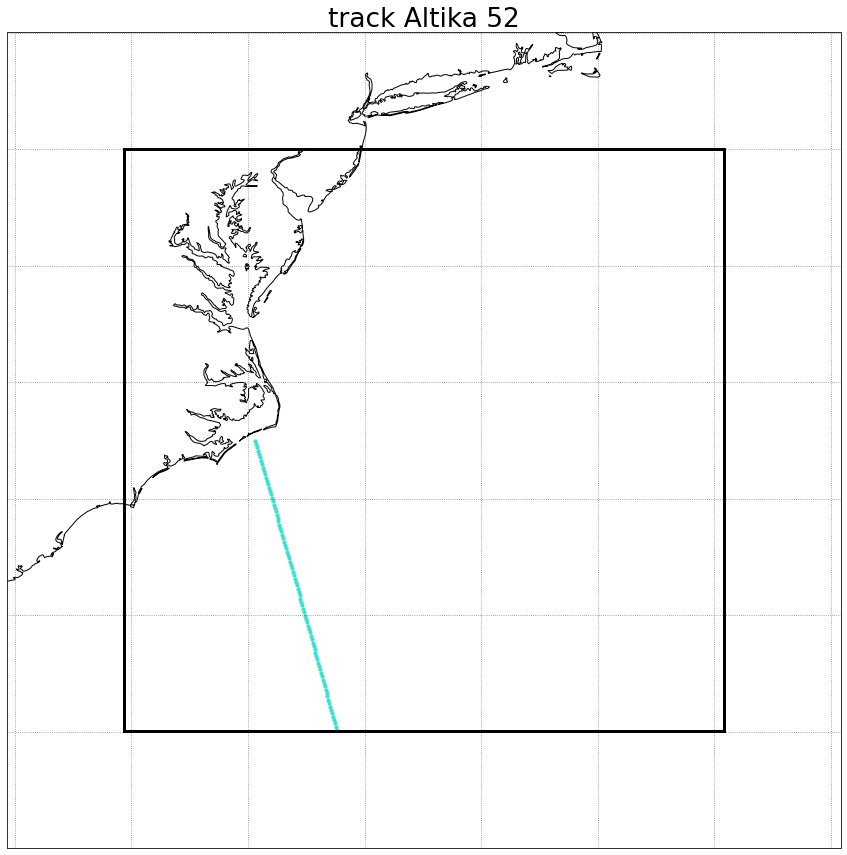

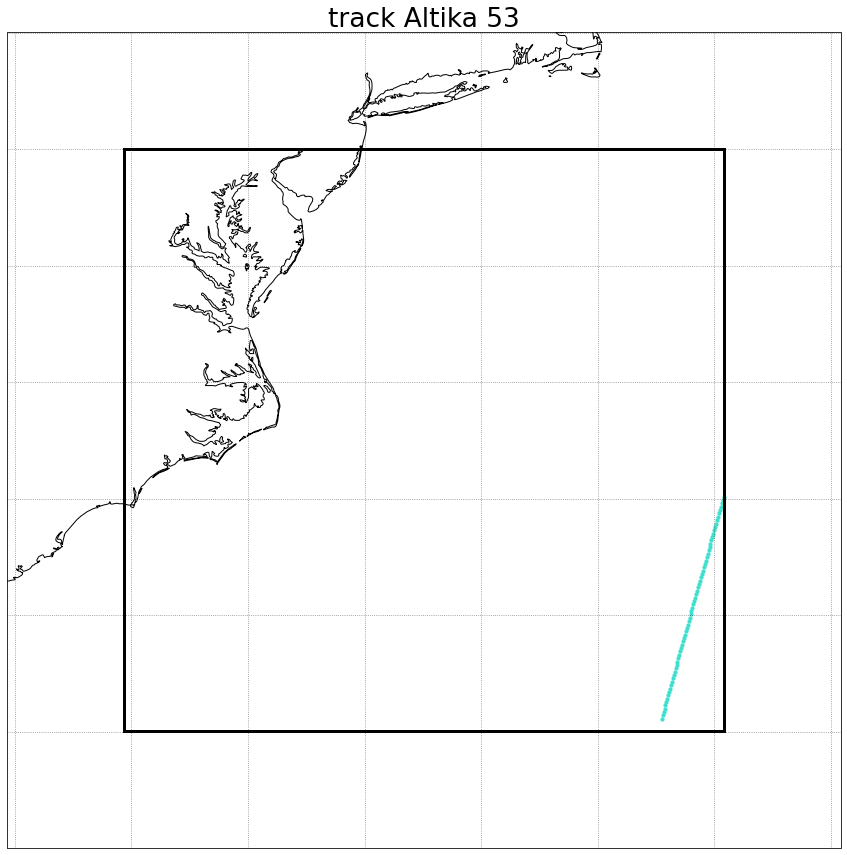

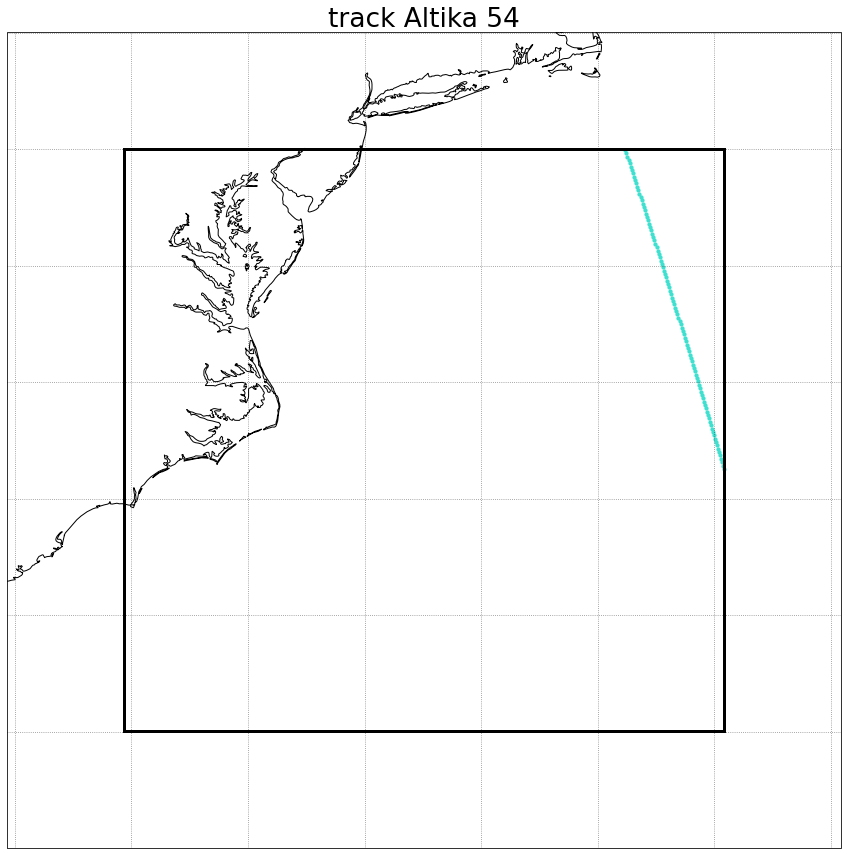

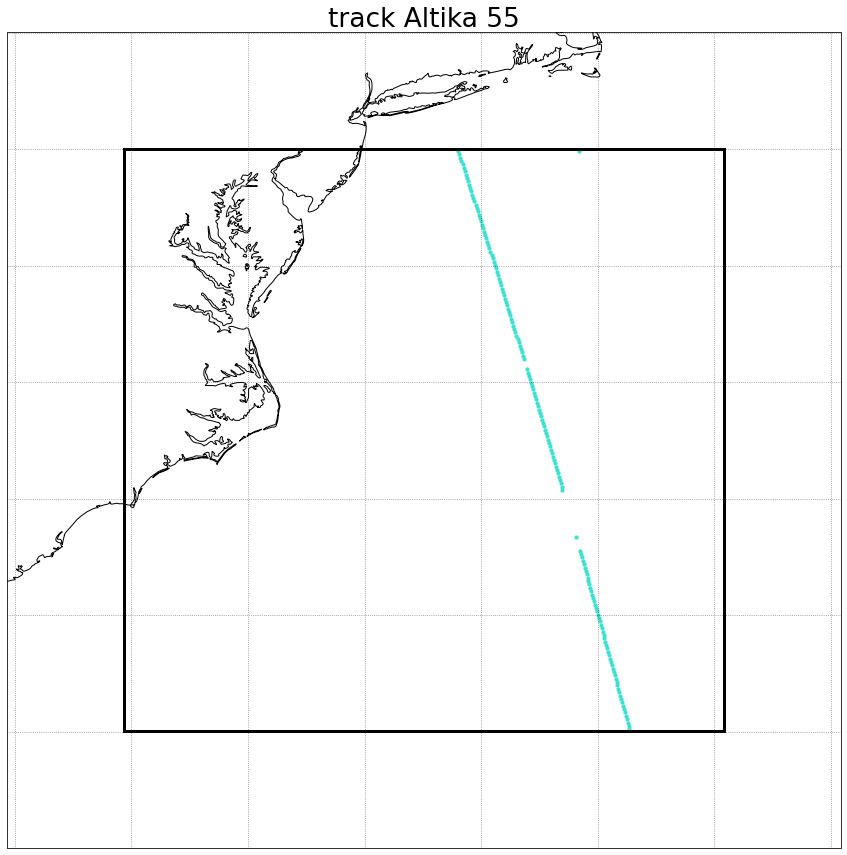

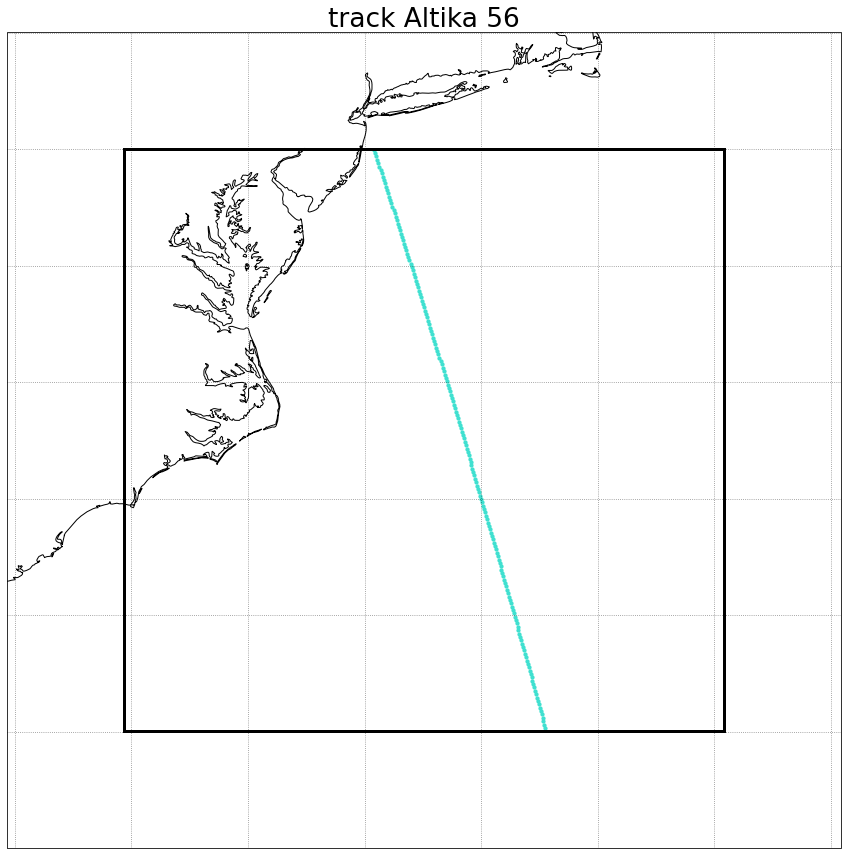

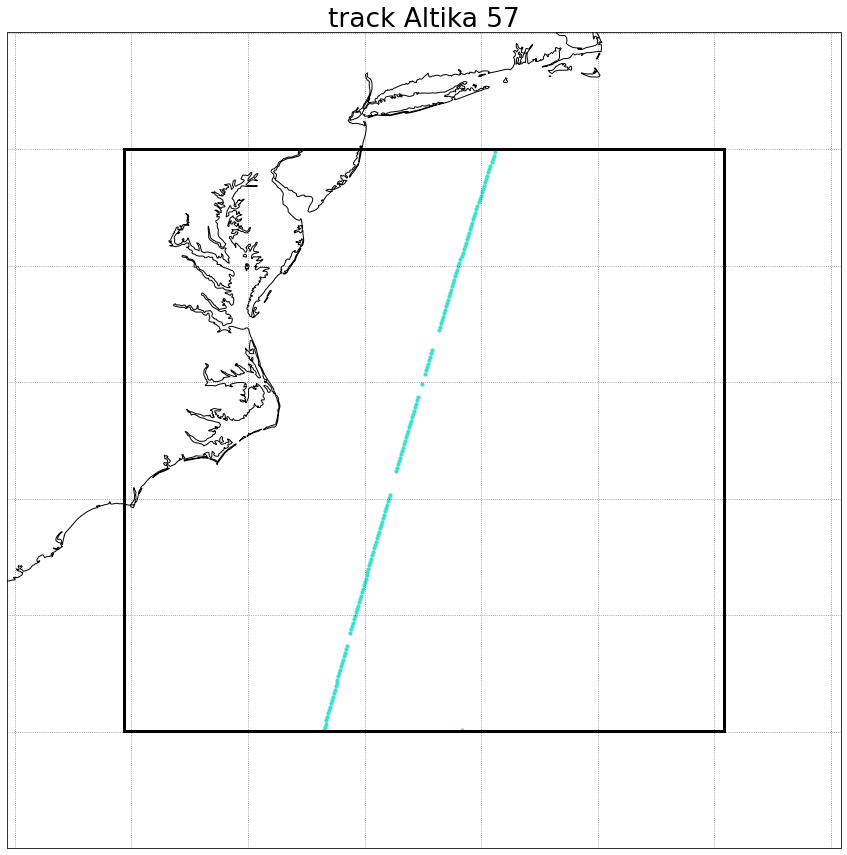

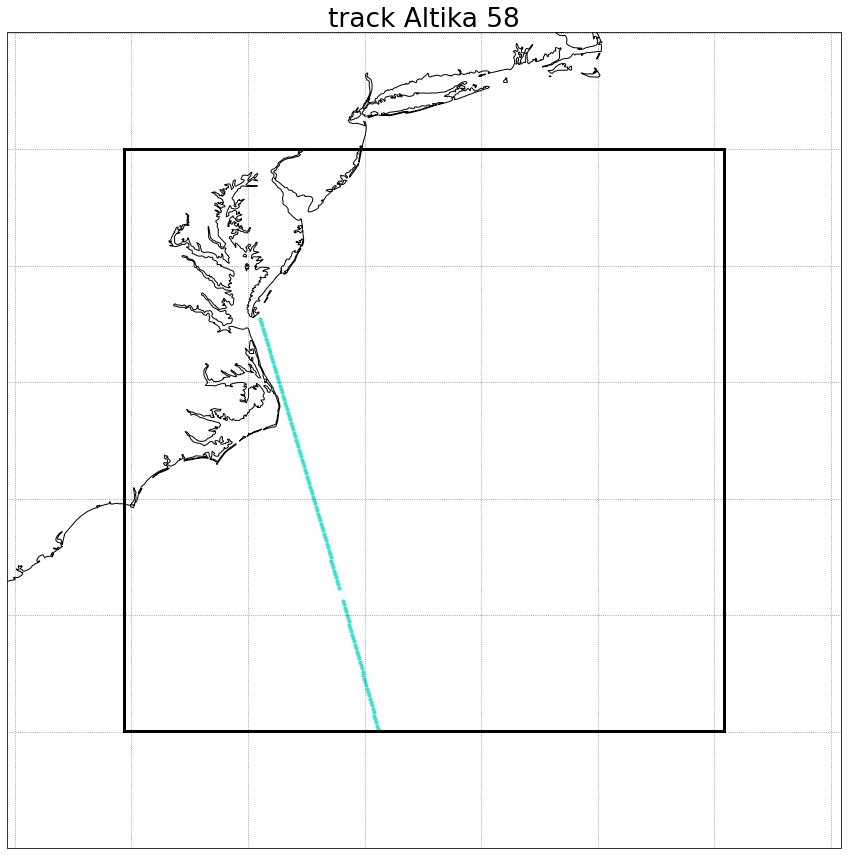

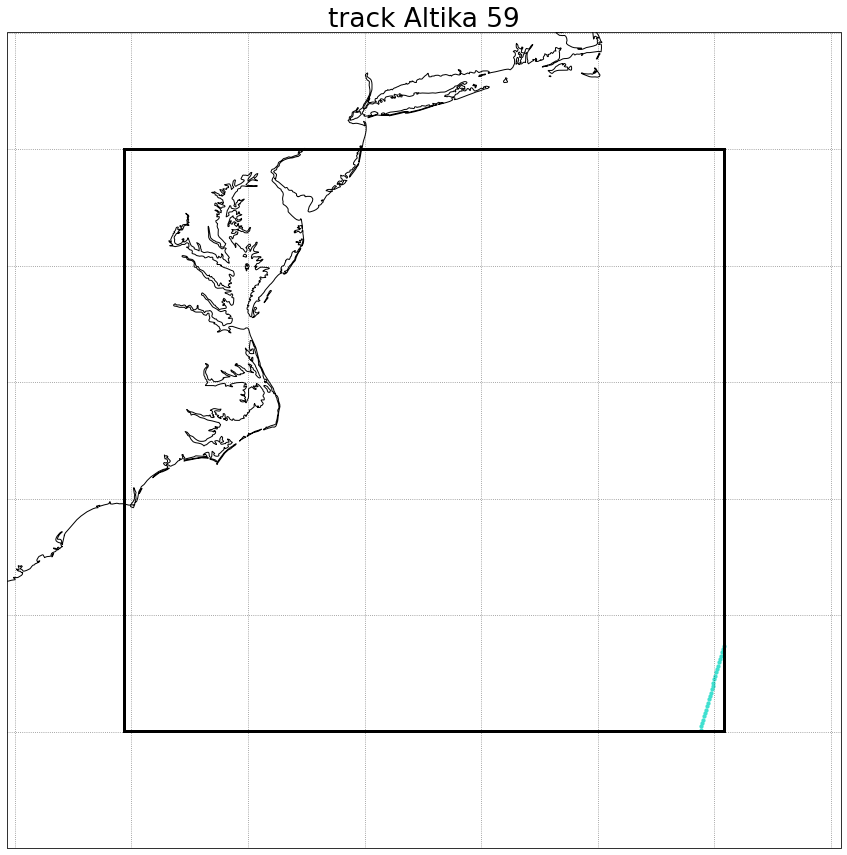

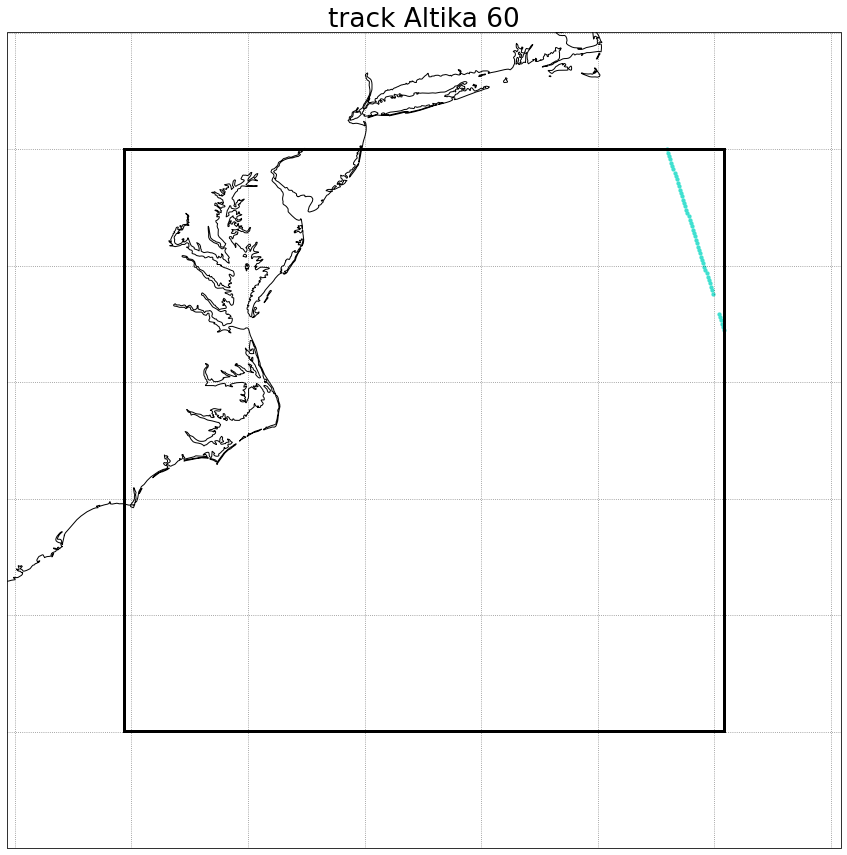

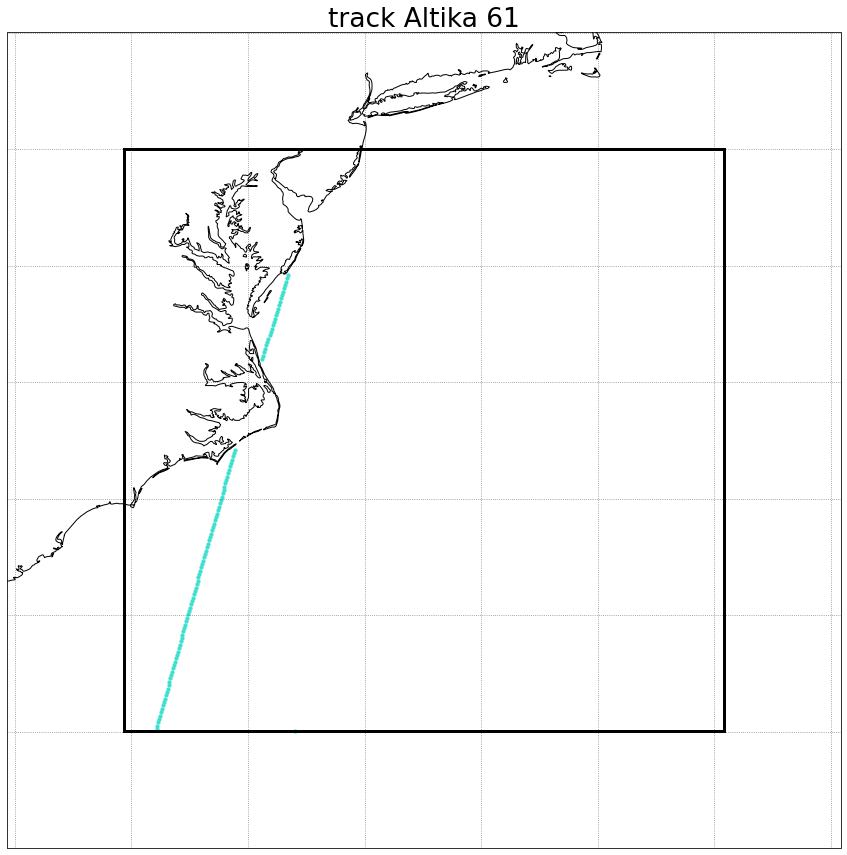

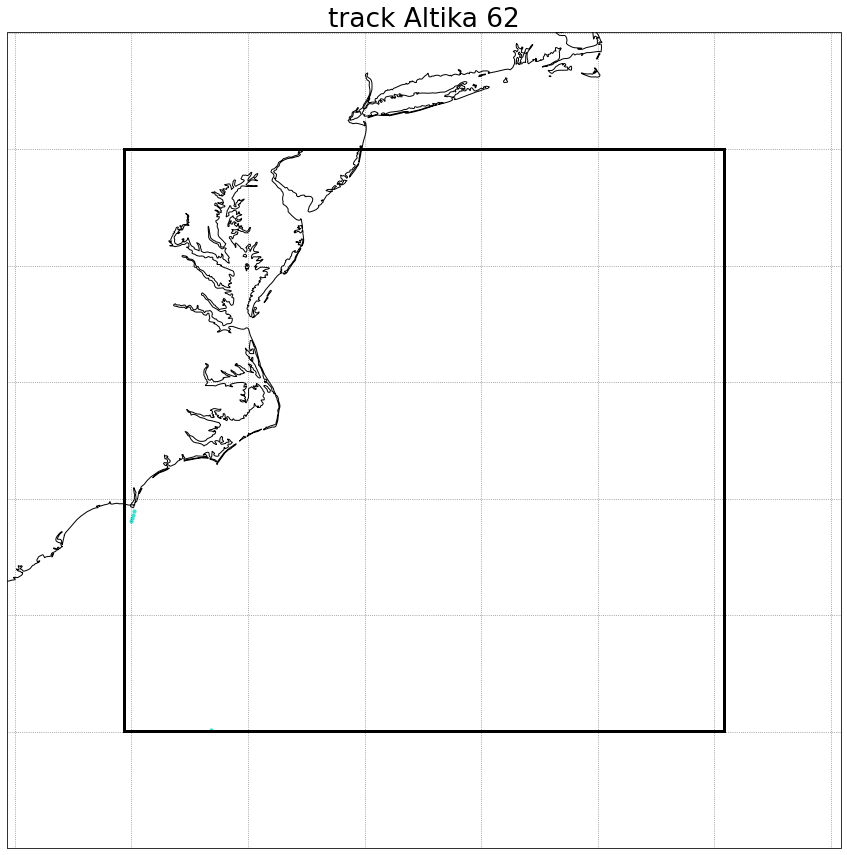

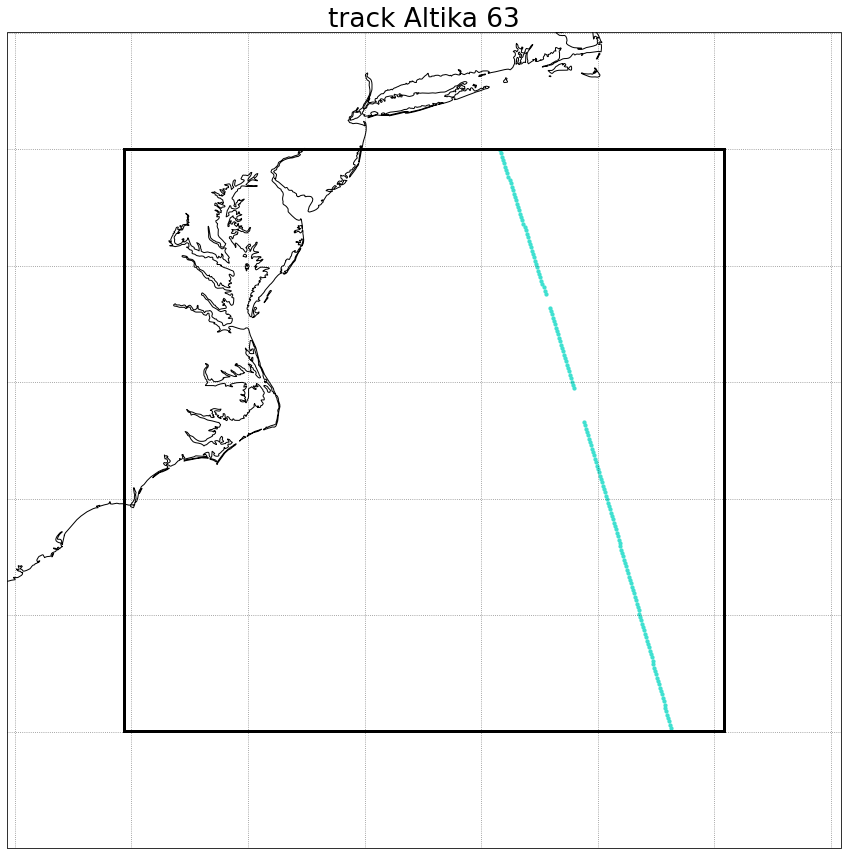

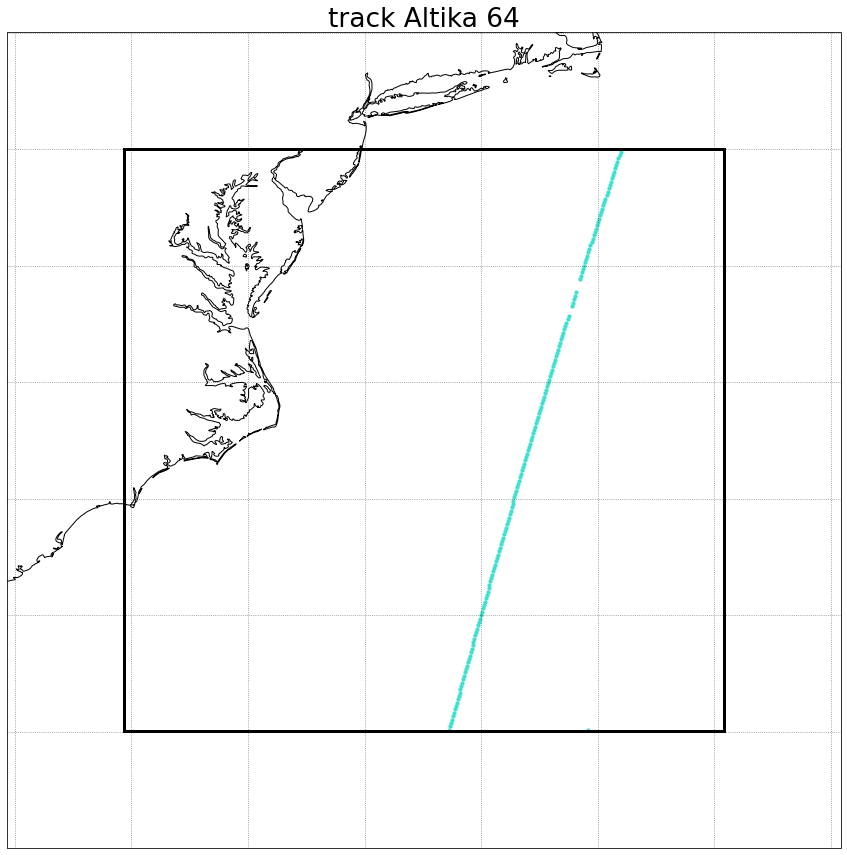

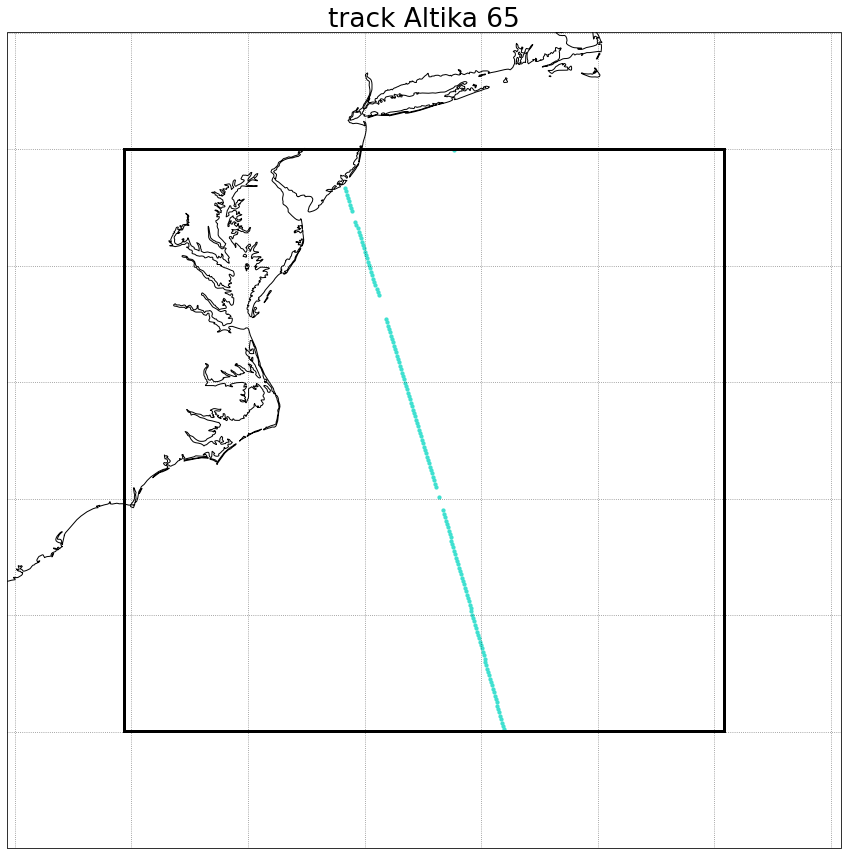

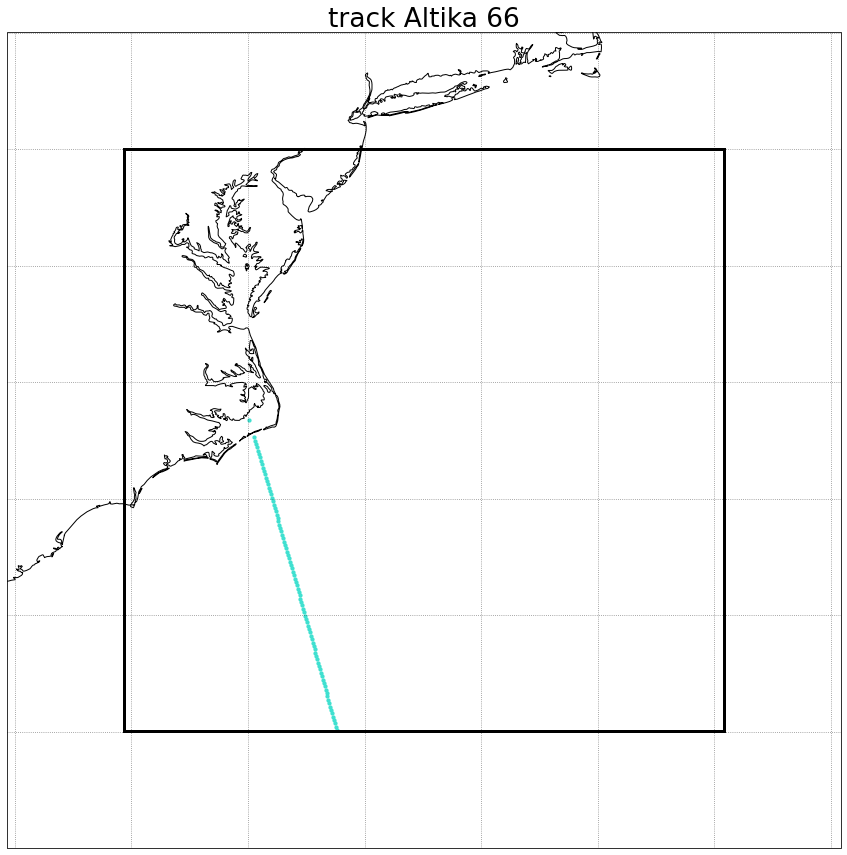

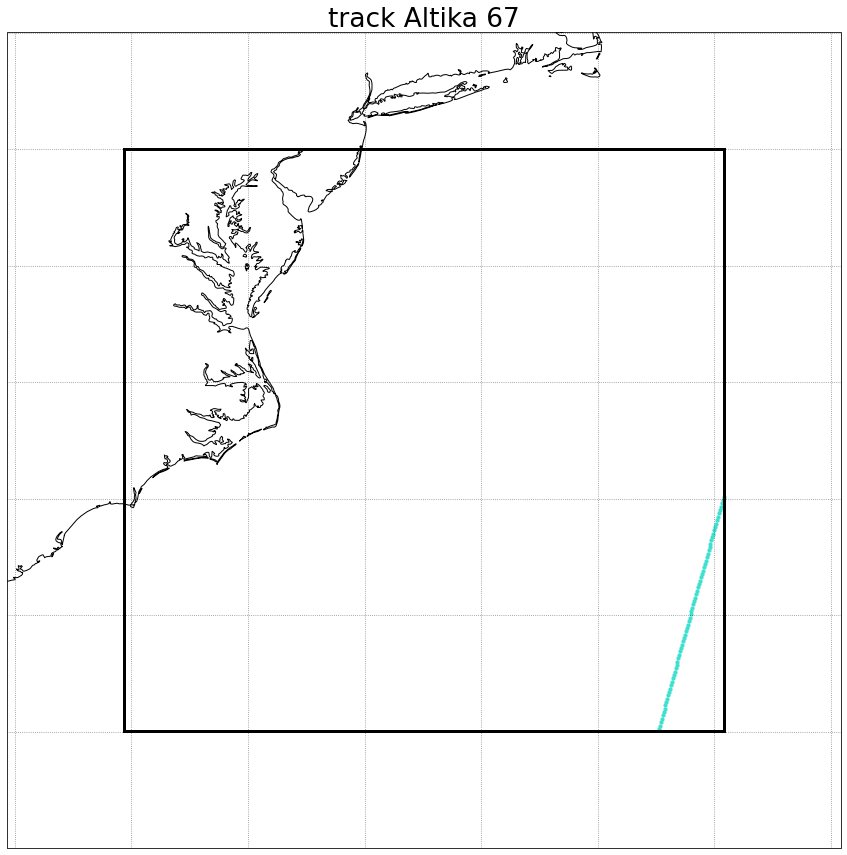

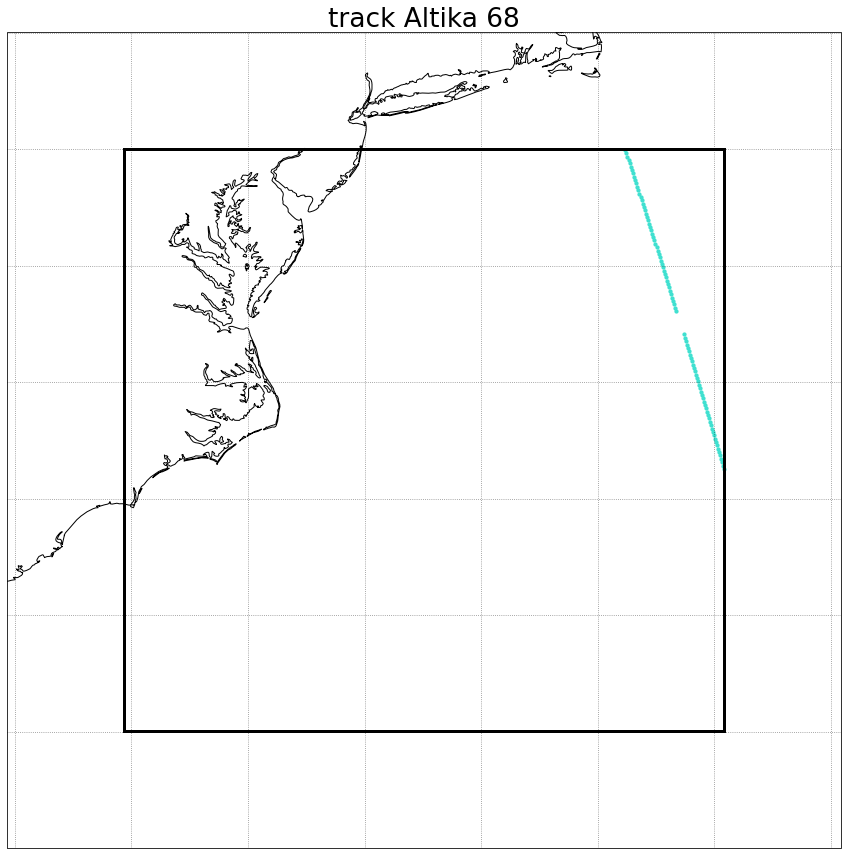

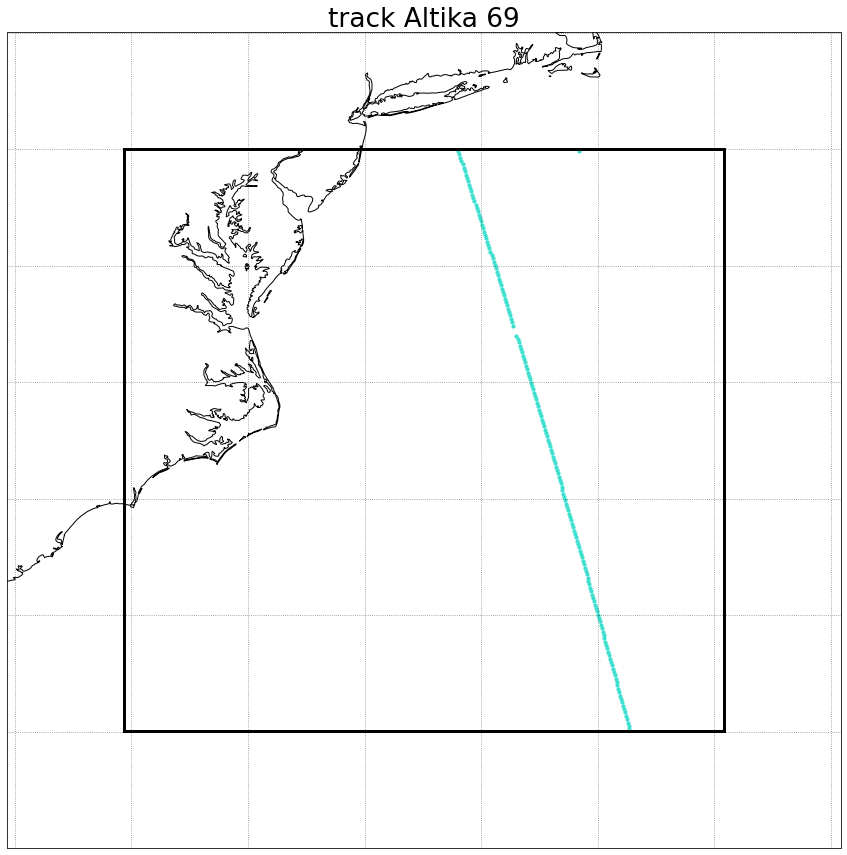

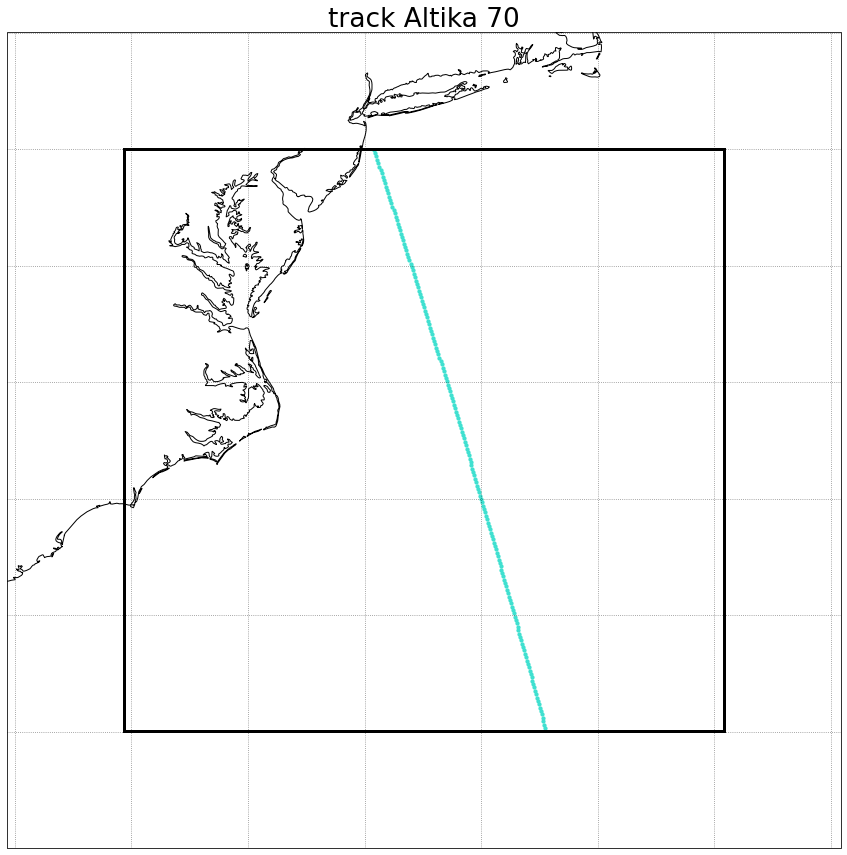

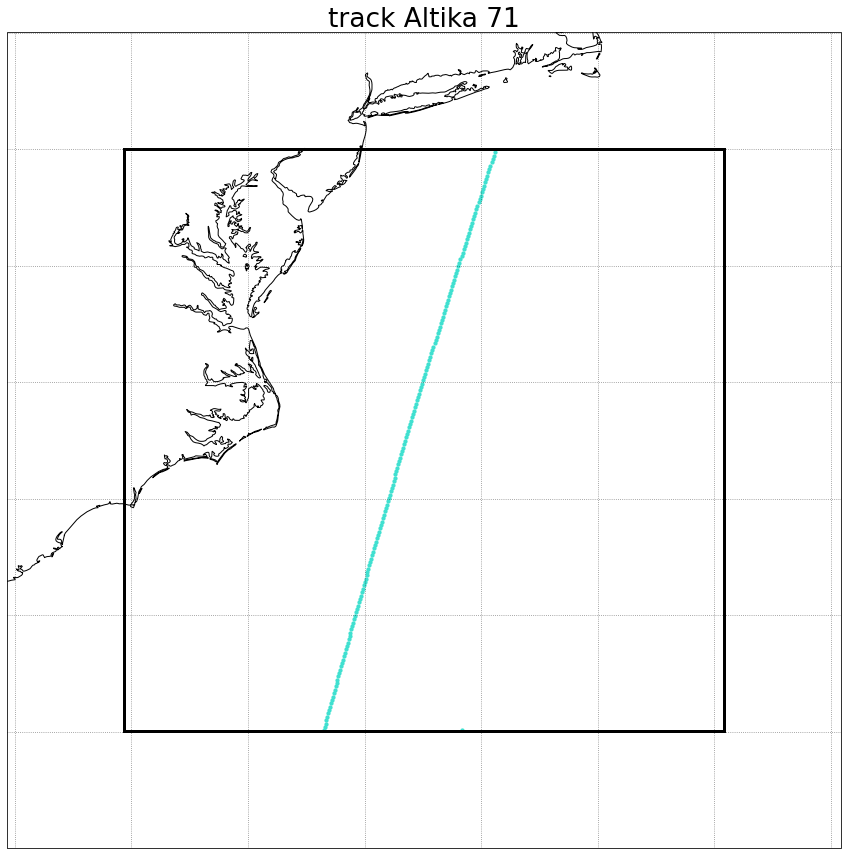

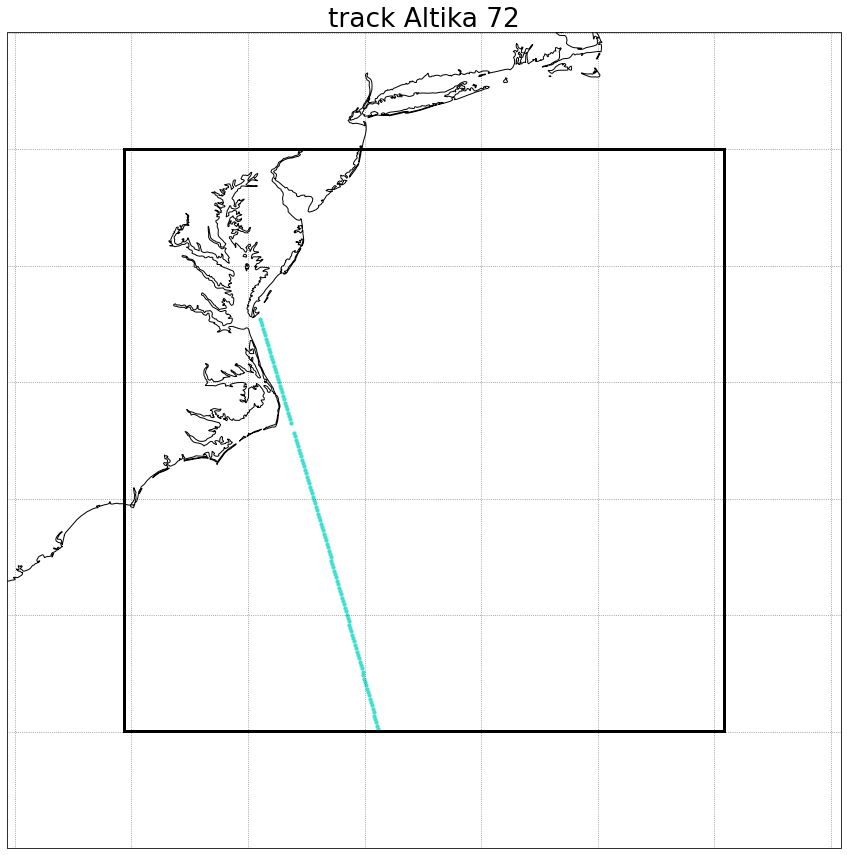

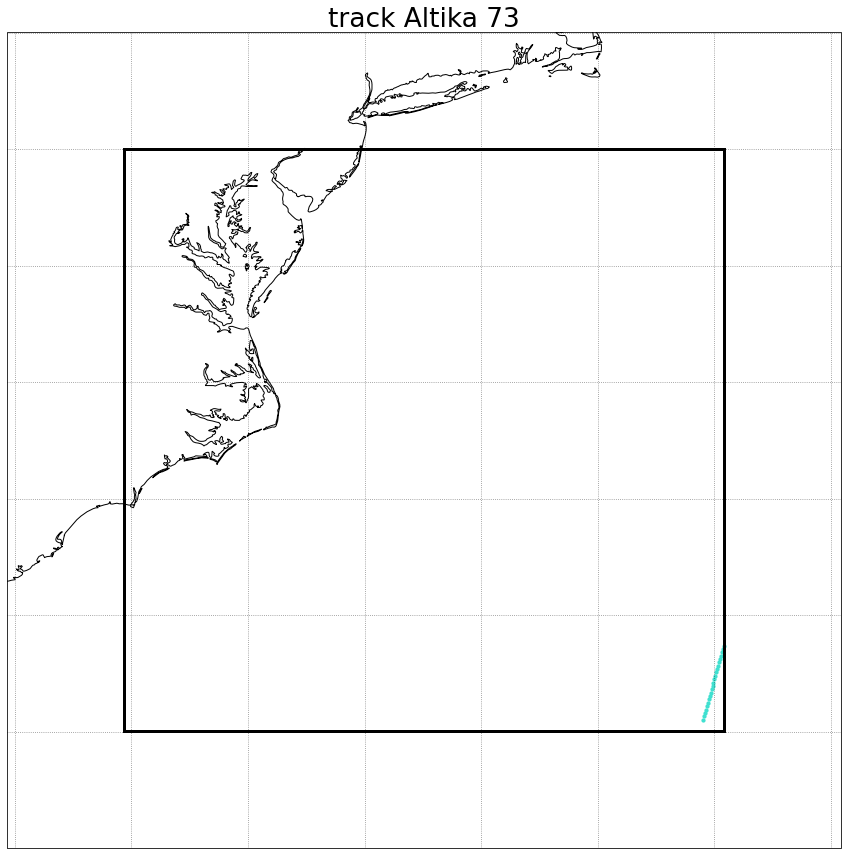

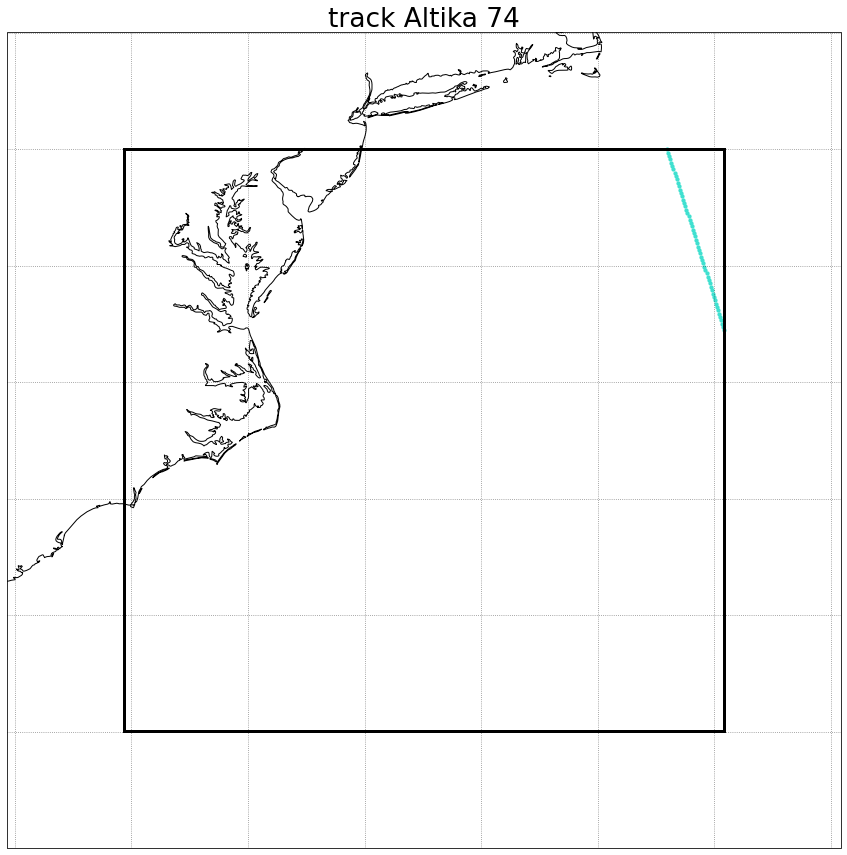

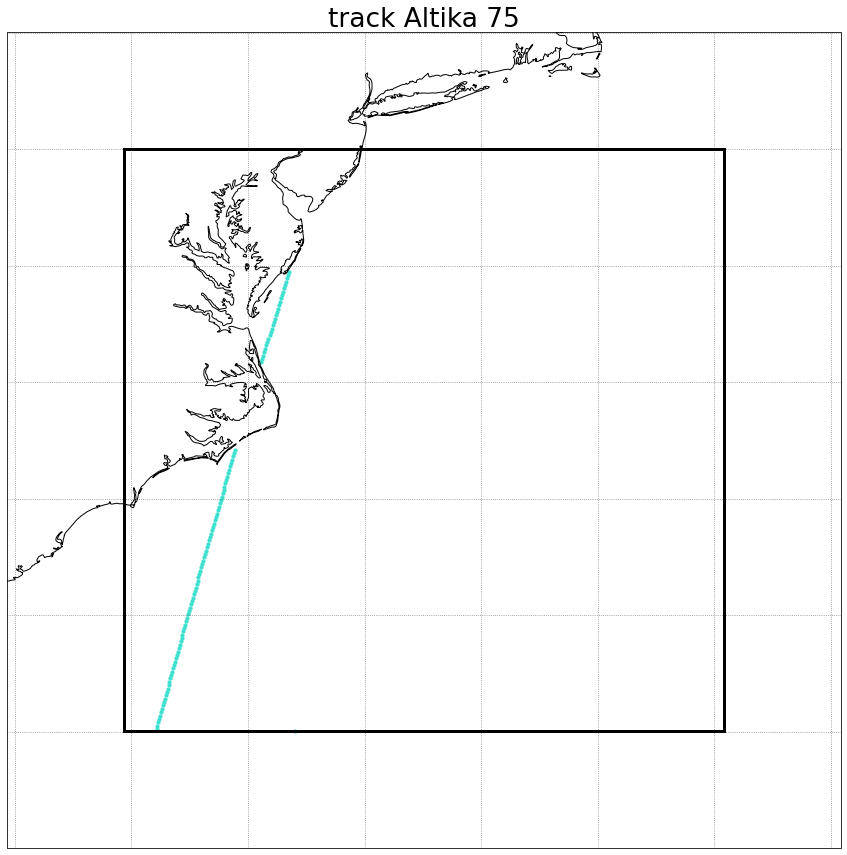

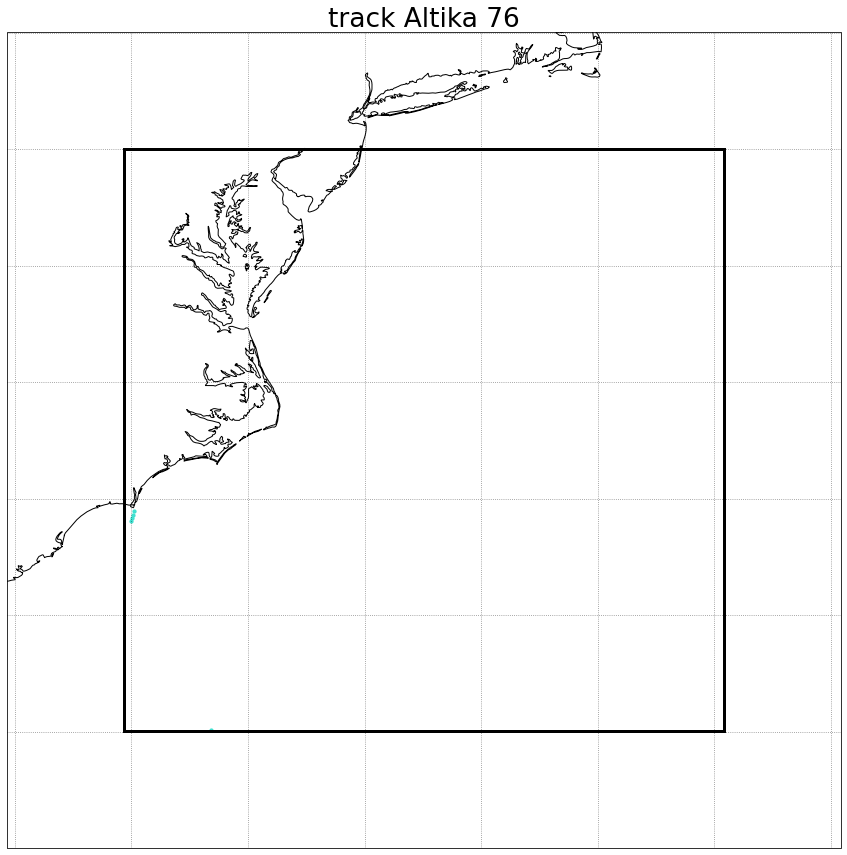

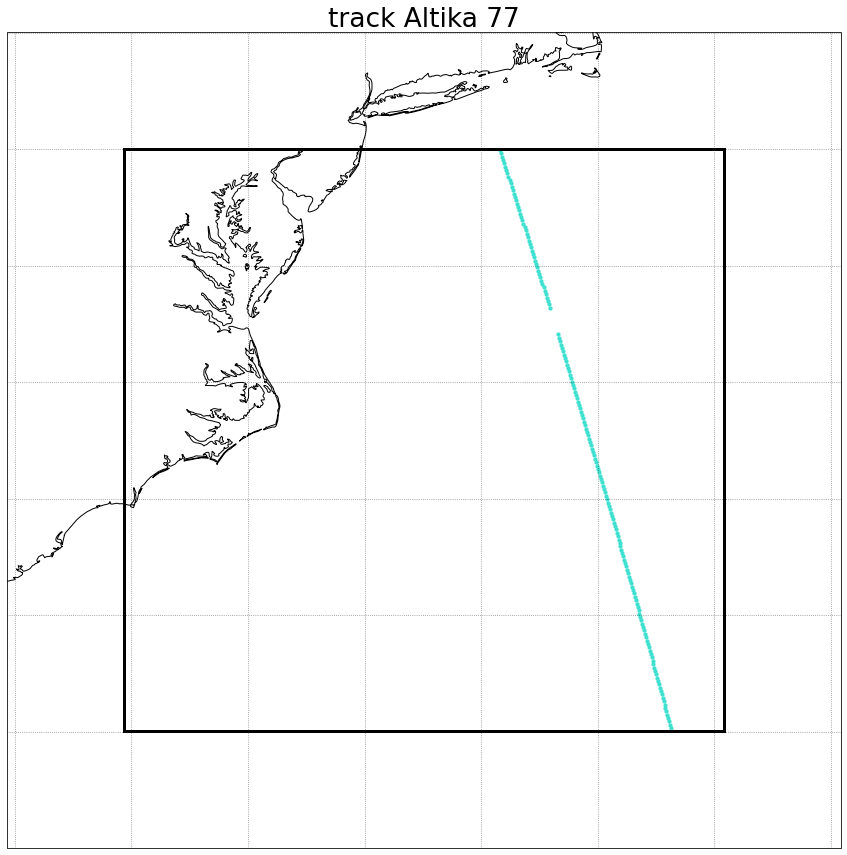

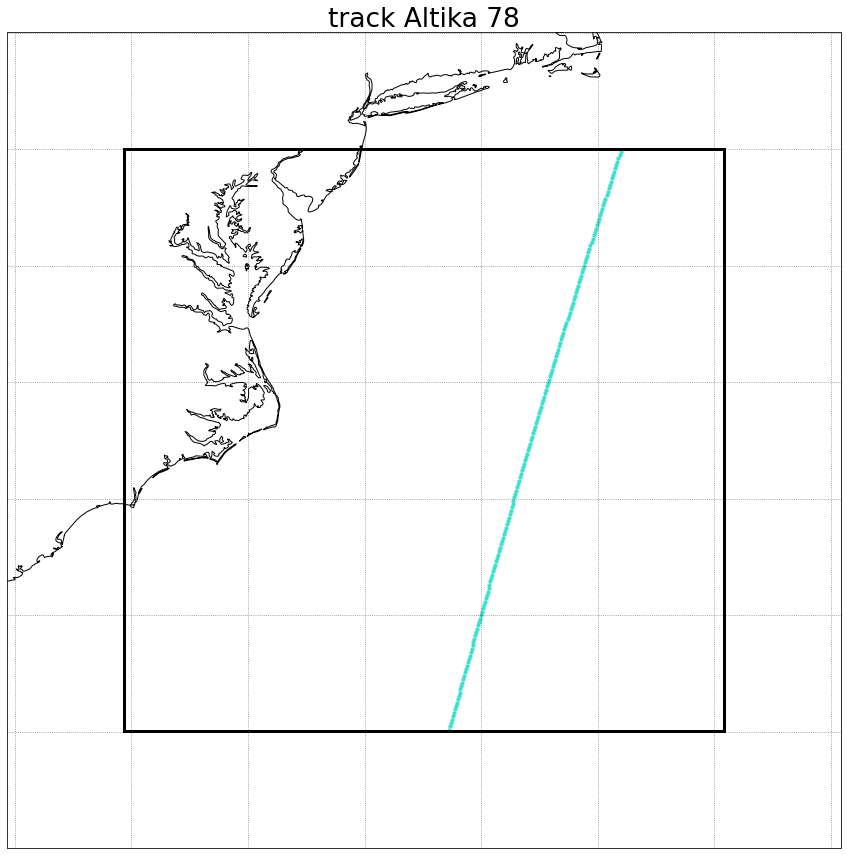

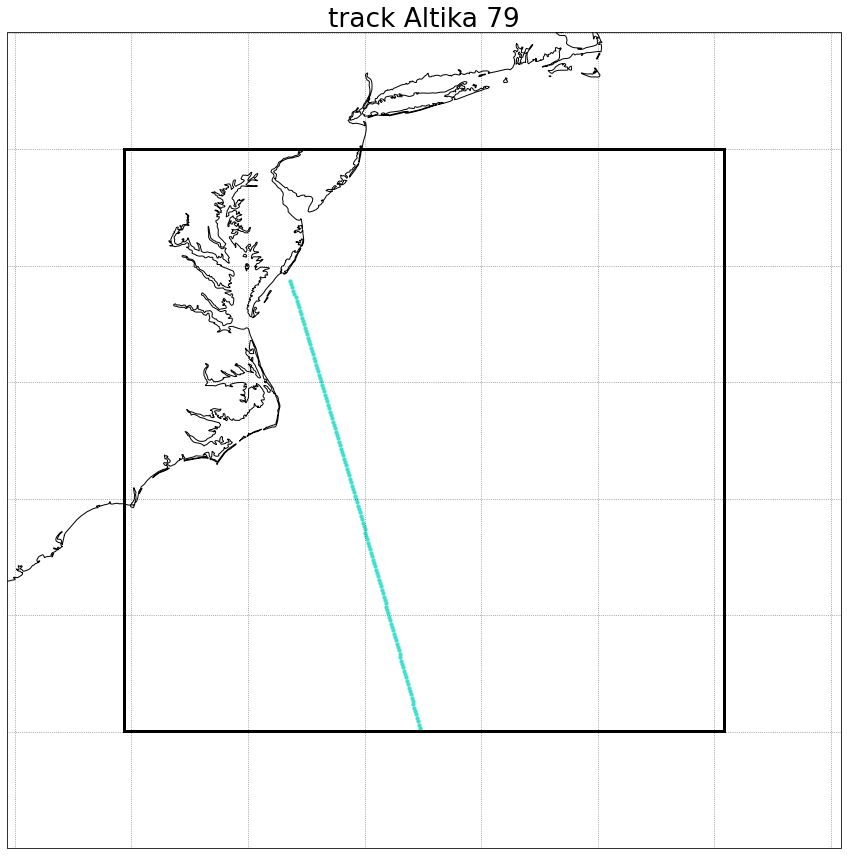

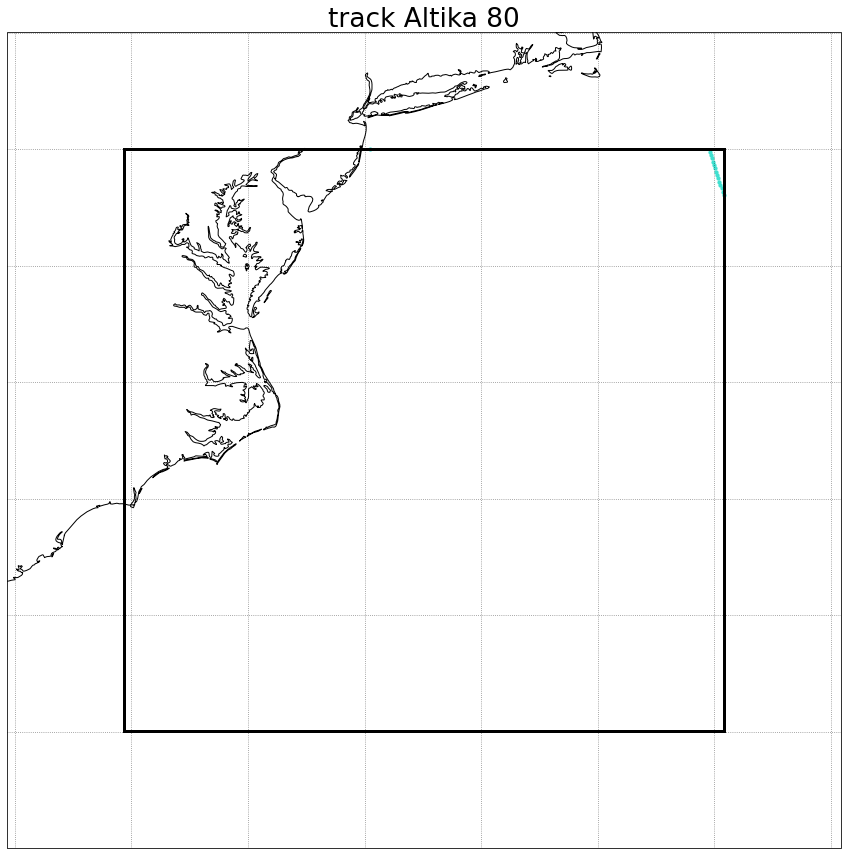

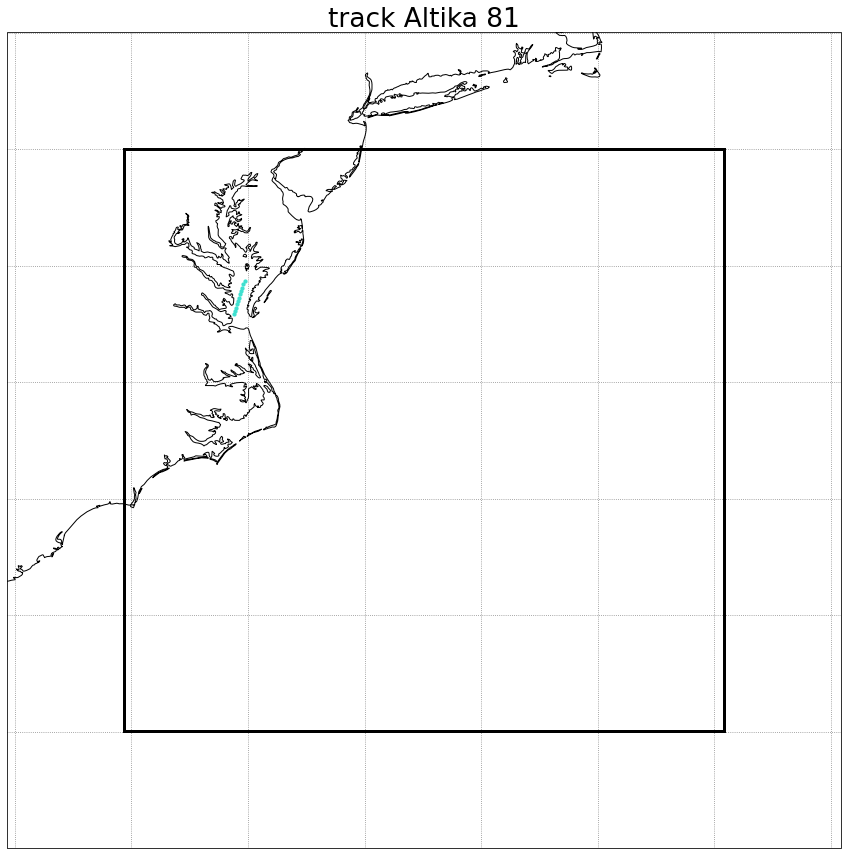

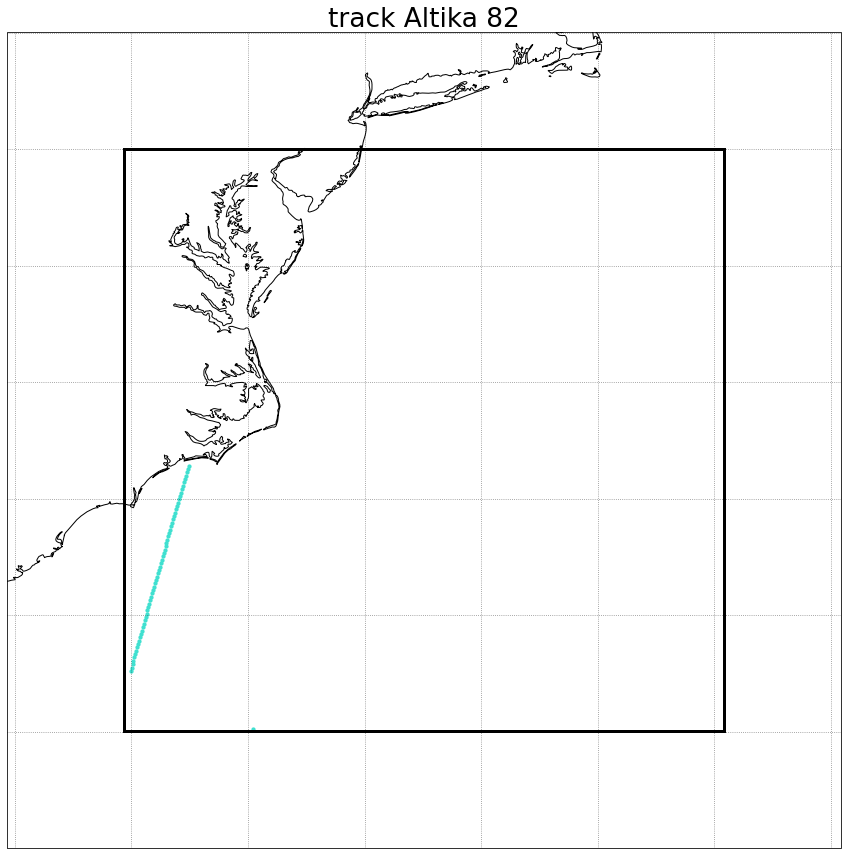

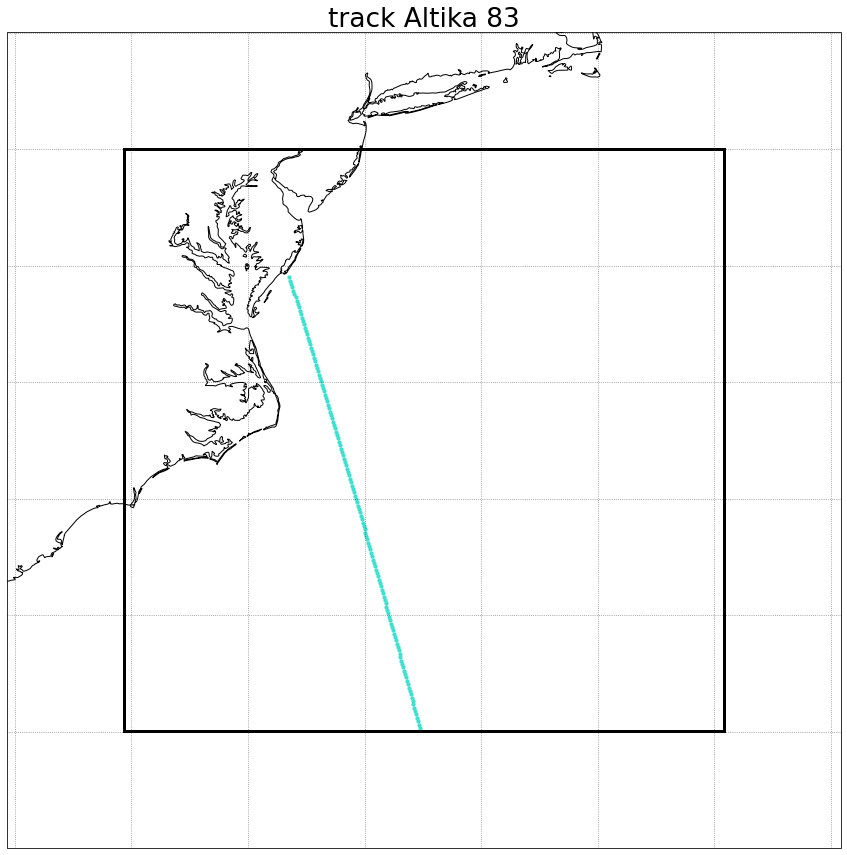

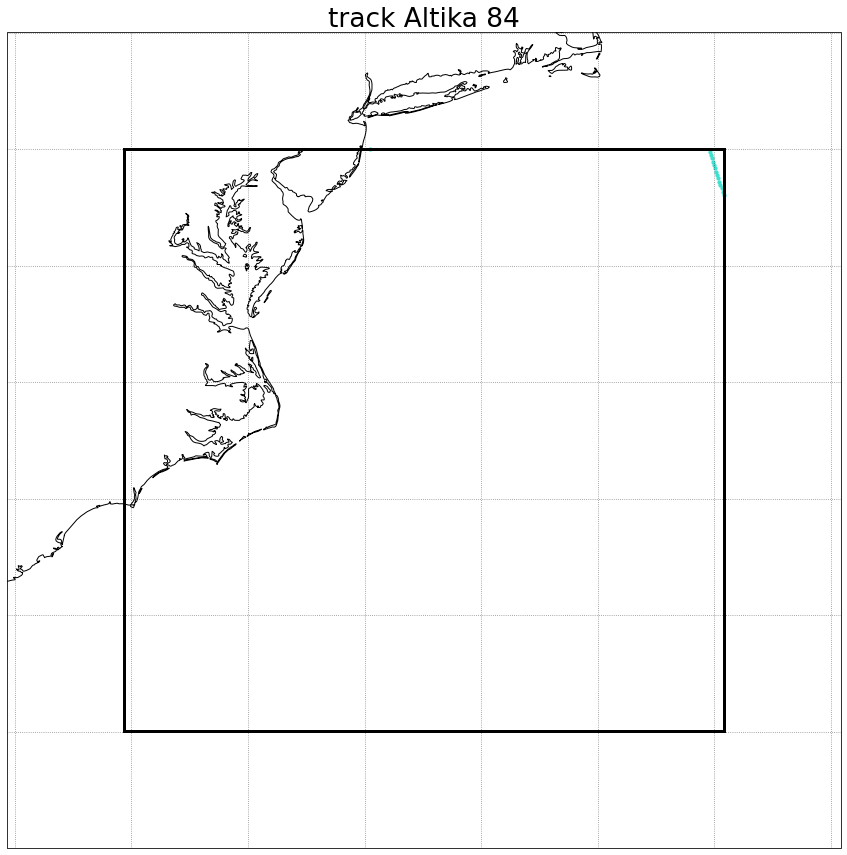

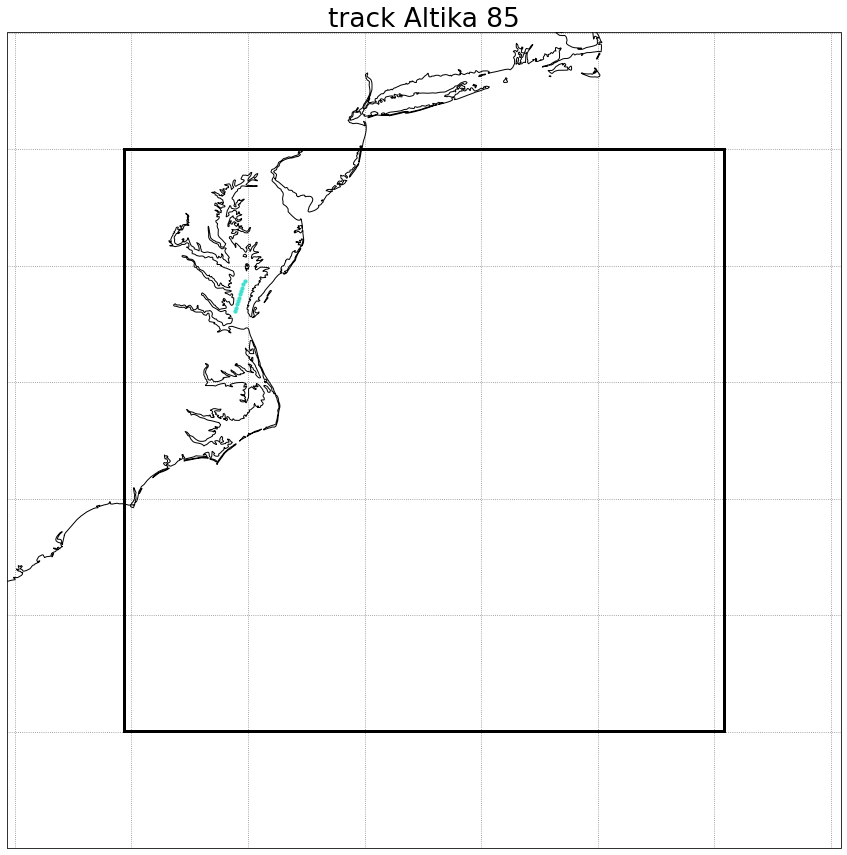

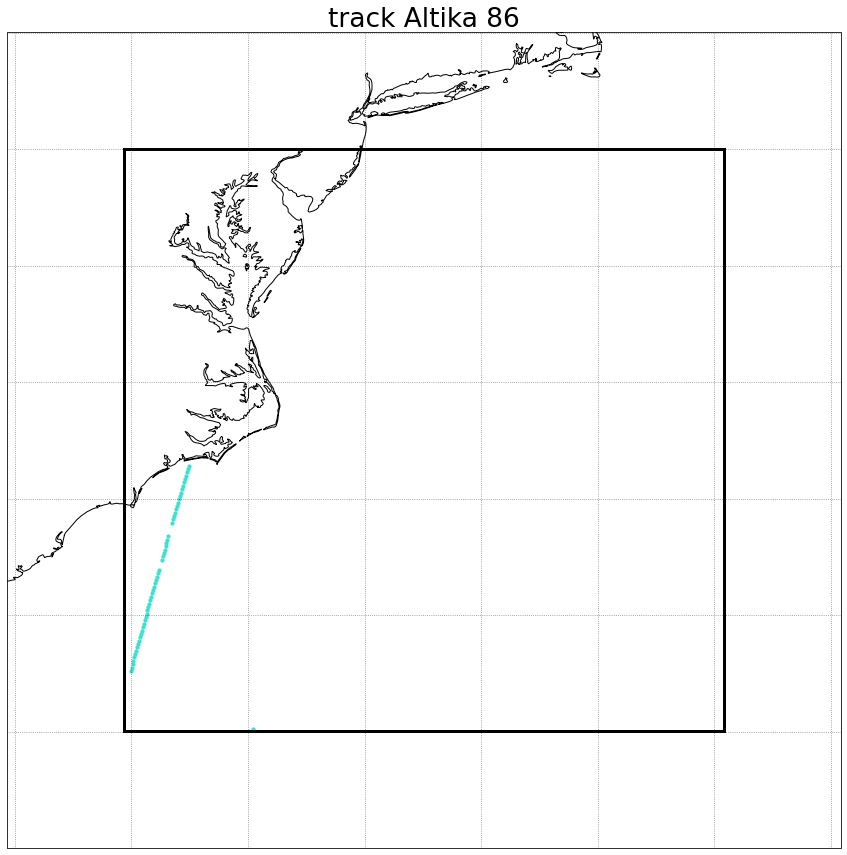

In [27]:
#I plot all the separate tracks
for k in np.arange(len(index_tracks)):
    
    fig=plt.figure(figsize=(20,15))
    ax = plt.subplot(111,projection=ccrs.PlateCarree(central_longitude=0))
    ax.set_extent((lonminM-2, lonmaxM+2, latminM-2, latmaxM+2))
    ax.coastlines(resolution="10m")
    gl = ax.gridlines(draw_labels=True, linestyle=':', color='black',
                              alpha=0.5)
    gl.top_labels = False
    gl.right_labels = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    ax.tick_params('both',labelsize=22)

    ax.plot([lonminM, lonminM], [latminM, latmaxM],color='black',linewidth=3,transform=ccrs.PlateCarree())
    ax.plot([lonmaxM, lonmaxM], [latminM, latmaxM],color='black',linewidth=3,transform=ccrs.PlateCarree())
    ax.plot([lonminM, lonmaxM], [latminM, latminM],color='black',linewidth=3,transform=ccrs.PlateCarree())
    ax.plot([lonminM, lonmaxM], [latmaxM, latmaxM],color='black',linewidth=3,transform=ccrs.PlateCarree())    

    plt.scatter(ST.lon[index_tracks[k][0]:index_tracks[k][1]+1],ST.lat[index_tracks[k][0]:index_tracks[k][1]+1], c='turquoise',
                label='altika tracks', linewidth=0, s=18,
                transform=ccrs.PlateCarree(),zorder=1);
    plt.title('track Altika '+str(k))
    plt.savefig('plots-tracks_clean/altika_tracks_'+str(k)+'.png')